# Análisis de ventas para optimizar estrategias de marketing

Se nos ha entregado un conjunto de datos que contiene información sobre las ventas de la empresa en los últimos dos años. Nuestra tarea es analizar estos datos para identificar patrones y tendencias en el comportamiento de los clientes y productos, con el objetivo de optimizar las estrategias de marketing y mejorar la rentabilidad de la empresa. 

Para ver la presentación haz clic [acá](https://github.com/emalbran/Practicum-Data-Analyst/blob/main/final_proyect/result_presentation.pdf).

Para ver el Dashboard haz clic [aquí](https://public.tableau.com/app/profile/eric.malbran/viz/nalisisdeVentas-Ecomerce/DashboardFinal)

La compañía aportó el archivo **ecommerce_dataset_us.csv** que contiene el historial de transacciones de su tienda en línea desde 2018 hasta 2019. Este archivo contiene las siguientes columnas:
- `InvoiceNo`: El identificador de pedido. En un pedido pueden haber varios árticulos pero corresponde a un solo cliente.

- `StockCode`: El identificador único de cada artículo.

- `Description`: El nombre del artículo.

- `Quantity`: La cantidad de artículos comprados.

- `InvoiceDate`: La fecha del pedido. Esta corresponde a un formato dd/MM/YYYY HH:mm

- `UnitPrice`: El precio por artículo.

- `CustomerID`: El ID de cada cliente.

Para completar este proyecto, lo dividiremos en las siguientes secciones:
* Descargar y optimizar los datos
* Análisis exploratorio de datos (EDA)
* Estudio de Clientes
* Estudio de Productos

Despúes de realizar estos pasos, intentaremos responder a las siguientes hipótesis:
1. Los clientes que compran más de una vez tienden a gastar más que los clientes que solo compran una vez.
2. Los productos que se venden más en ciertos meses del año pueden estar relacionados con eventos o festividades que se celebran en esos meses.
3. Los clientes que realizan compras más grandes pueden ser más leales y propensos a realizar compras recurrentes.
4. El precio de los productos puede estar relacionado con su popularidad, es decir, los productos más populares pueden tener un precio más elevado.
5. Los clientes que han realizado compras más grandes pueden ser más propensos a realizar compras en el futuro debido a su inversión previa en los productos.

En base a este estudio terminaremos el proyecto indicando nuestras conclusiones y recomendaciones.

# Contenido <a id='back'></a>

* [1 Descarga y optimización de datos](#exploracion_01)
    * [1.1 Cargar datos](#carga_datos)
* [2 Análisis exploratorio de datos](#analisis_datos)
    * [2.1 Tamaño del Dataset](#tamaño_datos)
    * [2.2 Cáracteristicas del Dataset](#caracteristicas_datos)
    * [2.3 Distribución del Dataset](#distribucion_datos)
    * [2.4 Revisión de Valores Ausentes](#datos_ausentes)
    * [2.5 Revisión de Valores Duplicados](#datos_duplicados)
    * [2.6 Corrección de valores atípicos](#datos_atipicos)
    * [2.7 Mejora de datos](#datos_mejorados)
* [3 Estudio de Clientes](#estudio_clientes)
    * [3.1 Identificación de clientes que realizan una sola compra](#clientes_1)
    * [3.2 Identificación de clientes que realizan múltiples compras](#clientes_2)
    * [3.3 Análisis del número de nuevos clientes por mes](#clientes_3)
    * [3.4 Análisis del gasto promedio de los clientes](#clientes_4)
    * [3.5 Variación del gasto promedio de los clientes por mes](#clientes_5)
    * [3.6 Productos más populares entre los clientes](#clientes_6)
    * [3.7 Clientes que realizan las compras más grandes](#clientes_7)
    * [3.8 Análisis de la frecuencia de compras de los clientes](#clientes_8)
    * [3.9 Comparación de clientes con y sin ID](#clientes_9)
* [4 Estudio de Productos](#estudio_productos)
    * [4.1 Evolución de precios por mes](#productos_1)
    * [4.2 Ranking de los productos más vendidos](#productos_2)
    * [4.3 Los productos menos vendidos](#productos_3)
    * [4.4 Análisis de ventas mensuales](#productos_4)
    * [4.5 Análisis de productos asociados](#productos_5)
    * [4.6 Productos favoritos de los clientes habituales](#productos_6)
* [5 Estudio de Hipótesis](#estudio_hipotesis)
    * [5.1 Hipótesis 1](#hipotesis_1) \
        Los clientes que compran más de una vez tienden a gastar más que los clientes que solo compran una vez
    * [5.2 Hipótesis 2](#hipotesis_2) \
        Los productos que se venden más en ciertos meses del año pueden estar relacionados con eventos o festividades que se celebran en esos meses
    * [5.3 Hipótesis 3](#hipotesis_3) \
        Los clientes que realizan compras más grandes pueden ser más leales y propensos a realizar compras recurrentes
    * [5.4 Hipótesis 4](#hipotesis_4) \
        El precio de los productos puede estar relacionado con su popularidad, es decir, los productos más populares pueden tener un precio más elevado
    * [5.5 Hipótesis 5](#hipotesis_5) \
        Los clientes que han realizado compras más grandes pueden ser más propensos a realizar compras en el futuro debido a su inversión previa en los productos
    * [5.6 Hipótesis 6](#hipotesis_6) \
        Los clientes que han realizado compras sin enrolarse en la plataforma se comportan de manera igual que los que tiene customer ID
* [6 Conclusiones y Recomendaciones](#conclusiones_finales)
     * [6.1 Recomendaciones](#recomendaciones)

## Descarga y optimización de datos <a id='exploracion_01'></a>

En esta sección vamos a cargar la tabla **ecommerce_dataset_us.csv**, nos vamos a preocupar de que las categorías sean las correctas y verificaremos que la glosa de las columnas estén en un formato correcto. También revisaremos si hay datos ausentes y/o duplicados. Para realizar nuestro estudio cargaremos las siguientes librerías:

In [631]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.stats import spearmanr

Utilizaremos la siguiente paleta para nuestros gráficos:

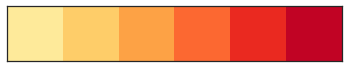

In [632]:
palette = sns.color_palette("YlOrRd")
palette_2 = sns.color_palette("YlOrRd", 2)
sns.palplot(palette)

### Carga de datos: <a id='carga_datos'></a>

Lo primero que hicimos fue una visualización general de los datos, revisando una muestra de 500 líneas. Entonces nos dimos cuenta que teníamos 7 columnas con un tamaño de los datos descargados de 149.6 kb. Estos fueron las categorías que encontramos:

- Object: InvoiceNo, StockCode, Description y InvoiceDate
- int64: Quantity y CustomerID
- float64: UnitPrice

Como se ve, los nombres tienen mayúsculas y minúsculas, necesitaremos regularizar eso. No encontramos ninguna columna que corresponda al tipo categoría, pero si descubrimos InvoiceDate que corresponde a DateTime. Al cambiar la categoría de dicha columna, notamos una ligera mejora. Nuestra muestra pasó a pesar 117.9 KB. Descargaremos entonces los datos con el tipo correcto y cambiaremos el nombre de las columnas para utilizar snake_case:

In [633]:
snake_case = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id']

ecomerce = pd.read_csv(
    '/datasets/ecommerce_dataset_us.csv', 
    sep = '\t', 
    parse_dates=['invoice_date'],
    names=snake_case,
    header=0
)

In [634]:
ecomerce.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 124.3 MB


Como podemos notar pasamos de 500 filas a 541909, y el peso del archivo ecomerce completo (124.3MB) es un poco más liviano que ecomerce_sample sin optimizar (149.6). Ahora revisaremos que nuestra columna obtimizada 'invoice_date' tiene todos los datos:

In [635]:
print('La fecha de inicio del proyecto es:')
print(ecomerce['invoice_date'].min())
print('La fecha de fin del proyecto es:')
print(ecomerce['invoice_date'].max())

La fecha de inicio del proyecto es:
2018-11-29 08:26:00
La fecha de fin del proyecto es:
2019-12-07 12:50:00


Acá notamos un problema, solo tenemos datos desde noviembre 2018, debería ser desde enero 2018. Revisamos el archivo que recibimos y efectivamente los datos parte en noviembre 2018, o sea que no tenemos los datos de dos años como originalmente pensamos. Realizaremos el análisis exploratorio de datos y quizás podemos reducir un poco más el tamaño antes de avanzar a nuestras secciones de estudio.

## Análisis exploratorio de datos <a id='analisis_datos'></a>

En esta sección revisaremos el tamaño del dataset, analizaremos a fond las cáracteristicas y distribución de cada columna, estudiaremos y si es necesario corregiremos los valores ausentes, atípicos y duplicados. Finalmente, buscaremos mejorar nuestro dataset agregando columnas que sean oportunas para nuestros estudios posteriores.

### Tamaño del Dataset <a id='tamaño_datos'></a>

In [636]:
print('Presentación de las columnas del DataFrame:')
print(ecomerce.columns)
print()
print(f'Tenemos {len(ecomerce.axes[1])} columnas en total.')
print()
print('Revisión del número de líneas del DataFrame:')
print(len(ecomerce.axes[0]), 'líneas.')

Presentación de las columnas del DataFrame:
Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id'],
      dtype='object')

Tenemos 7 columnas en total.

Revisión del número de líneas del DataFrame:
541909 líneas.


### Cáracteristicas del Dataset <a id='caracteristicas_datos'></a>

En esta sección revisaremos un poco más a fondo nuestro dataset:

In [637]:
ecomerce.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 124.3 MB


Como se puede apreciar tenemos datos ausentes en la columna 'description' y 'customer_id'. Ya revisamos los Dtype de las columnas pero nos quedaron algunas preguntas. Estudiaremos un poco más a fondo las columnas 'invoice_no' y 'stock_code' que tienen el tipo object.

In [638]:
ecomerce.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0


La columna 'invoice_no' aparece con Dtype object, esto quiere decir que no tiene solo números. Vamos a revisarla más a fondo, crearemos una nueva columna que se llamará 'invoice_cat' que tendrá solo strings:

In [639]:
ecomerce['invoice_cat'] = ecomerce["invoice_no"].str.extract('(\D+)', expand=False).str.strip()
ecomerce['invoice_cat'].value_counts()

C    9288
A       3
Name: invoice_cat, dtype: int64

Como se puede apreciar tenemos dos nomenclaturas a analizar. Partiremos con la categoría A ya que tiene solo 3 líneas:

In [640]:
ecomerce.query('invoice_cat == "A"')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_cat
299982,A563185,B,Adjust bad debt,1,2019-08-10 14:50:00,11062.06,NaN,A
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,NaN,A
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,NaN,A


Como se puede apreciar la categoría A corresponde a un ajuste por deuda. No hay customer_id y al parecer quería restar 11.062.06 dolares pero se equivocaron y tuvieron que rectificar. No eliminaremos estos datos porque sería interesante entender a que corresponde esta deuda. Analizaremos la categoría C ahora:

In [641]:
ecomerce.query('invoice_cat == "C"').head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,invoice_cat
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0,C
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311.0,C
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548.0,C
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0,C
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0,C
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0,C
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2018-11-29 10:24:00,3.45,17548.0,C
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2018-11-29 10:24:00,1.65,17548.0,C
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2018-11-29 10:24:00,1.65,17548.0,C
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2018-11-29 12:38:00,4.25,17897.0,C


En el caso de la categoría C, notamos que esta corresponde a un descuento de algún tipo. O sea que, podemos guardar esta columna y quitarle a 'invoice_no' las letras, para no tener valores ausentes en la columna 'invoice_cat', le pondremos N (normal) a todos los nan:

In [642]:
ecomerce["invoice_no"]=ecomerce["invoice_no"].str.extract('(\d+)')
ecomerce["invoice_no"]=ecomerce["invoice_no"].astype('int64')
ecomerce = ecomerce.iloc[:,[0,7,1,2,3,4,5,6]]
ecomerce["invoice_cat"] = ecomerce["invoice_cat"].fillna("N")
ecomerce["invoice_cat"]=ecomerce["invoice_cat"].astype('category')
ecomerce.head()

,invoice_no,invoice_cat,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,N,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,N,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,N,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,N,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,N,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0


Muy bien con esto, nuestra columna 'invoice_no' tiene solo el número de cada factura lo que facilitará las agrupaciones más adelante, y por otro lado nuestra columna 'invoice_cat' nos permitirá revisar filtrar por categoría cuando lo necesitemos.

In [643]:
ecomerce.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  int64         
 1   invoice_cat   541909 non-null  category      
 2   stock_code    541909 non-null  object        
 3   description   540455 non-null  object        
 4   quantity      541909 non-null  int64         
 5   invoice_date  541909 non-null  datetime64[ns]
 6   unit_price    541909 non-null  float64       
 7   customer_id   406829 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 96.4 MB


Comprobamos que no quedaron valores ausentes en nuestras primeras dos columnas, ahora tienen los Dtype correctos y además logramos reducir un poco más el peso del archivo. Al revisar las primeras 5 líneas del dataframe, se puede notar que 'stock_code' tiene números y letras, vamos crear una columna solo para las letras que se llamará 'stock_cat':

In [644]:
ecomerce['stock_cat'] = ecomerce["stock_code"].str.extract('(\D+)', expand=False).str.strip()
ecomerce['stock_cat'].value_counts()

B               13803
A               12680
C                6625
D                3705
L                2277
E                2199
F                1973
S                1726
G                1493
POST             1256
M                1022
P                 768
DOT               710
N                 611
a                 542
K                 429
b                 412
H                 380
BL                326
c                 231
J                 222
W                 192
d                 180
U                 166
l                 113
e                 100
s                  93
R                  90
n                  84
bl                 62
g                  60
V                  52
BANK CHARGES       37
AMAZONFEE          34
gift_              34
f                  29
p                  26
DCGS               21
T                  17
CRUK               16
DCGSSGIRL          13
I                  13
DCGSSBOY           11
k                  10
Z                  10
Y         

Como en el caso anterior revisaremos las que tienen menos datos primero:

In [645]:
ecomerce.query('stock_cat == "GR" or stock_cat == "LP" or stock_cat == "m"').head(10)

,invoice_no,invoice_cat,stock_code,description,quantity,invoice_date,unit_price,customer_id,stock_cat
40383,539736,N,m,Manual,1,2018-12-19 15:18:00,2.55,NaN,m
431377,573592,N,79323GR,"Unsaleable, destroyed.",-1158,2019-10-29 15:16:00,0.00,NaN,GR
431378,573593,N,79323LP,"Unsaleable, destroyed.",-2618,2019-10-29 15:16:00,0.00,NaN,LP


La categoría GR y LP corresponden ambas a Unsaleable, destroyed items. Filtraremos por esa descripción primero:

In [646]:
ecomerce.query('description == "Unsaleable, destroyed."')

,invoice_no,invoice_cat,stock_code,description,quantity,invoice_date,unit_price,customer_id,stock_cat
431375,573590,N,79323G,"Unsaleable, destroyed.",-657,2019-10-29 15:15:00,0.0,NaN,G
431376,573591,N,79323B,"Unsaleable, destroyed.",-1671,2019-10-29 15:15:00,0.0,NaN,B
431377,573592,N,79323GR,"Unsaleable, destroyed.",-1158,2019-10-29 15:16:00,0.0,NaN,GR
431378,573593,N,79323LP,"Unsaleable, destroyed.",-2618,2019-10-29 15:16:00,0.0,NaN,LP
431379,573594,N,79323P,"Unsaleable, destroyed.",-2003,2019-10-29 15:16:00,0.0,NaN,P
431380,573595,N,79323S,"Unsaleable, destroyed.",-674,2019-10-29 15:17:00,0.0,NaN,S
431381,573596,N,79323W,"Unsaleable, destroyed.",-4830,2019-10-29 15:17:00,0.0,NaN,W
431382,573597,N,79341,"Unsaleable, destroyed.",-905,2019-10-29 15:18:00,0.0,NaN,NaN
431383,573598,N,79342B,"Unsaleable, destroyed.",-1128,2019-10-29 15:18:00,0.0,NaN,B


Uniremos todos estos en la misma categoría que llamaremos 'DEST':

In [647]:
ecomerce.loc[ecomerce['description'] == 'Unsaleable, destroyed.', 'stock_cat'] = 'DEST'

Revisaremos lo mismo para la descripción Manual:

In [648]:
ecomerce.query('description == "Manual"')['stock_cat'].value_counts()

M    571
m      1
Name: stock_cat, dtype: int64

In [649]:
ecomerce['stock_cat']=ecomerce['stock_cat'].replace(['m'],'M')

En el caso de la descripción 'Manual' teníamos datos en mayúscula y minúscula. Revisaremos si para otras letras ocurre lo mismo:

In [650]:
ecomerce.query('stock_cat == "A"').head(10)

,invoice_no,invoice_cat,stock_code,description,quantity,invoice_date,unit_price,customer_id,stock_cat
0,536365,N,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,A
49,536373,N,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 09:02:00,2.55,17850.0,A
66,536375,N,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 09:32:00,2.55,17850.0,A
100,536378,N,84519A,TOMATO CHARLIE+LOLA COASTER SET,6,2018-11-29 09:37:00,2.95,14688.0,A
120,536381,N,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2018-11-29 09:41:00,2.95,15311.0,A
172,536385,N,85049A,TRADITIONAL CHRISTMAS RIBBONS,12,2018-11-29 09:56:00,1.25,17420.0,A
203,536389,N,85014A,BLACK/BLUE POLKADOT UMBRELLA,3,2018-11-29 10:03:00,5.95,12431.0,A
220,536390,N,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2018-11-29 10:19:00,2.55,17511.0,A
262,536394,N,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2018-11-29 10:39:00,2.55,13408.0,A
278,536396,N,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 10:51:00,2.55,17850.0,A


In [651]:
ecomerce.query('stock_cat == "a"').head(10)

,invoice_no,invoice_cat,stock_code,description,quantity,invoice_date,unit_price,customer_id,stock_cat
5443,536862,N,84872a,TEATIME FUNKY FLOWER BACKPACK FOR 2,2,2018-12-01 11:13:00,11.02,NaN,a
5448,536862,N,85039a,SET/4 RED MINI ROSE CANDLE IN BOWL,1,2018-12-01 11:13:00,3.36,NaN,a
5672,536865,N,84559a,3D SHEET OF DOG STICKERS,1,2018-12-01 11:28:00,1.69,NaN,a
5675,536865,N,84884a,ANT WHITE WIRE HEART SPIRAL,1,2018-12-01 11:28:00,8.47,NaN,a
5677,536865,N,85014a,BLACK/BLUE POLKADOT UMBRELLA,2,2018-12-01 11:28:00,12.72,NaN,a
5680,536865,N,85039a,SET/4 RED MINI ROSE CANDLE IN BOWL,1,2018-12-01 11:28:00,3.36,NaN,a
6960,536982,N,85049a,TRADITIONAL CHRISTMAS RIBBONS,10,2018-12-01 14:27:00,3.36,NaN,a
6964,536982,N,85123a,WHITE HANGING HEART T-LIGHT HOLDER,35,2018-12-01 14:27:00,6.77,NaN,a
15773,537640,N,84989a,75 GREEN FAIRY CAKE CASES,1,2018-12-05 15:31:00,2.13,NaN,a
15777,537640,N,85049a,TRADITIONAL CHRISTMAS RIBBONS,55,2018-12-05 15:31:00,3.36,NaN,a


In [652]:
ecomerce.query('description == "WHITE HANGING HEART T-LIGHT HOLDER"')['stock_cat'].value_counts()

A    2302
a      67
Name: stock_cat, dtype: int64

Comprobamos que la categoría de stock "A" es igual a "a", "C" es igual a "c" y "BL" es igual a "bl". Pasaremos todas las minúsculas a mayúsculas.

In [653]:
ecomerce['stock_cat'] = ecomerce['stock_cat'].str.upper()
ecomerce['stock_cat'].value_counts()

B               14213
A               13222
C                6856
D                3885
L                2390
E                2299
F                2002
S                1818
G                1552
POST             1256
M                1023
P                 793
DOT               710
N                 695
K                 439
BL                388
H                 380
J                 222
W                 191
U                 166
R                  90
V                  52
BANK CHARGES       37
GIFT_              34
AMAZONFEE          34
DCGS               21
T                  17
CRUK               16
I                  13
DCGSSGIRL          13
DCGSSBOY           11
Z                  10
DEST                9
Y                   8
O                   5
PADS                4
Name: stock_cat, dtype: int64

Vamos a analizar las categorías que quedaron:

In [654]:
ecomerce.query('stock_cat == "Z"').head(5)

,invoice_no,invoice_cat,stock_code,description,quantity,invoice_date,unit_price,customer_id,stock_cat
16777,537666,N,90214Z,"LETTER ""Z"" BLING KEY RING",1,2018-12-05 18:36:00,0.85,NaN,Z
24905,538349,N,90214Z,"LETTER ""Z"" BLING KEY RING",1,2018-12-08 14:59:00,0.85,NaN,Z
37066,539453,N,90214Z,"LETTER ""Z"" BLING KEY RING",1,2018-12-15 17:08:00,0.85,NaN,Z
107874,545464,N,90214Z,"LETTER ""Z"" BLING KEY RING",1,2019-03-01 09:10:00,0.83,NaN,Z
161023,550470,N,90214Z,"LETTER ""Z"" BLING KEY RING",1,2019-04-16 13:49:00,0.83,NaN,Z


Al revisar las categorías notamos que las categorias con letras (ejemplo Z, Y, O...) son en realidad items que tienen su código númerico individual y quizás se le añade está letra para crear una familia de items. Esto debido a que hay ciertas letras que tienen dos o tres items distintos. Sin embargo no se pudo encontrar una relación entre productos como para definir estás familias. En muchos casos la letra simplemente corresponde a la letra del llavero que se está vendiendo. En consecuencia crearemos una columna que se llamará 'stock_no' para guardar cada número individual y guardaremos 'stock_cat' con las letras individuales agrupadas en una categoría 'ITEMS'.

Por otro lado, las palabras más largas (por ejemplo, CRUK, GIFT_, AMAZONFEE, DOT...) corresponden a vouchers y descuentos de envío o comisiones, por lo que las dejaremos a parte.

Finalmente, encontramos el grupo DCGS que corresponde a un stock code completamente distinto a los de letras únicas, así que ese lo mantendremos separado del resto.

In [655]:
ecomerce["stock_no"]=ecomerce["stock_code"].str.extract('(\d+)')
ecomerce["stock_no"]=ecomerce["stock_no"].fillna(0)
ecomerce["stock_no"]=ecomerce["stock_no"].astype('int64')
ecomerce = ecomerce.iloc[:,[0,1,2,9,8,3,4,5,6,7]]

In [656]:
ecomerce['stock_cat'] = ecomerce['stock_cat'].replace(['A','B','D','L','E','F','S','G'], 'ITEMS')
ecomerce['stock_cat'] = ecomerce['stock_cat'].replace(['P','N','K','BL','H','J','W','U'], 'ITEMS')
ecomerce['stock_cat'] = ecomerce['stock_cat'].replace(['R','V','T','I','Z','Y','O','C', 'M'], 'ITEMS')
ecomerce['stock_cat'] = ecomerce['stock_cat'].replace(['DCGSSGIRL','DCGSSBOY'], 'DCGS')
ecomerce['stock_cat'] = ecomerce['stock_cat'].replace(['GIFT_'], 'GIFT')

Verificaremos rápidamente cuantos valores ausentes nos quedaron:

In [657]:
ecomerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  int64         
 1   invoice_cat   541909 non-null  category      
 2   stock_code    541909 non-null  object        
 3   stock_no      541909 non-null  int64         
 4   stock_cat     54874 non-null   object        
 5   description   540455 non-null  object        
 6   quantity      541909 non-null  int64         
 7   invoice_date  541909 non-null  datetime64[ns]
 8   unit_price    541909 non-null  float64       
 9   customer_id   406829 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 37.7+ MB


Como se puede apreciar son muchos valores ausentes, vamos a analizar estos:

In [658]:
ecomerce_filtered_nan = ecomerce[ecomerce['stock_cat'].isna()]

In [659]:
ecomerce_filtered_nan = ecomerce[ecomerce['stock_cat'].fillna('x') == 'x']
print(ecomerce_filtered_nan.head(10))

    invoice_no invoice_cat stock_code  stock_no stock_cat  \
1       536365           N      71053     71053       NaN   
5       536365           N      22752     22752       NaN   
6       536365           N      21730     21730       NaN   
7       536366           N      22633     22633       NaN   
8       536366           N      22632     22632       NaN   
9       536367           N      84879     84879       NaN   
10      536367           N      22745     22745       NaN   
11      536367           N      22748     22748       NaN   
12      536367           N      22749     22749       NaN   
13      536367           N      22310     22310       NaN   

                          description  quantity        invoice_date  \
1                 WHITE METAL LANTERN         6 2018-11-29 08:26:00   
5        SET 7 BABUSHKA NESTING BOXES         2 2018-11-29 08:26:00   
6   GLASS STAR FROSTED T-LIGHT HOLDER         6 2018-11-29 08:26:00   
7              HAND WARMER UNION JACK       

Como se puede apreciar, los valores ausentes que tenemos se deben a 'stock_code' que no tenían letras. Para asegurarnos que solo corresponden a ITEMS, verificaremos si tenemos valores negativos:

In [660]:
ecomerce_filtered_nan.query('unit_price < 0')

,invoice_no,invoice_cat,stock_code,stock_no,stock_cat,description,quantity,invoice_date,unit_price,customer_id


No encontramos valores negativos, con lo cual rellenaremos los valores ausentes como ITEMS:

In [661]:
ecomerce["stock_cat"] = ecomerce["stock_cat"].fillna("ITEMS")
ecomerce["stock_cat"]=ecomerce["stock_cat"].astype('category')
ecomerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  int64         
 1   invoice_cat   541909 non-null  category      
 2   stock_code    541909 non-null  object        
 3   stock_no      541909 non-null  int64         
 4   stock_cat     541909 non-null  category      
 5   description   540455 non-null  object        
 6   quantity      541909 non-null  int64         
 7   invoice_date  541909 non-null  datetime64[ns]
 8   unit_price    541909 non-null  float64       
 9   customer_id   406829 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 34.1+ MB


Hemos logrado revisar las primeras columnas y darles categorías adecuadas. Además hemos logrado reducir el peso de nuestro archivo a solo 34.1 MB.

### Distribución del Dataset <a id='distribucion_datos'></a>

En esta sección revisaremos la distribución de nuestras columnas númericas:

In [662]:
ecomerce[['quantity', 'unit_price']].describe()

,quantity,unit_price
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


En realidad nos interesa la distribución solo de dos columnas, ya que 'invoice_no', 'stock_no' y 'customer_id' corresponden a digitos utilizados para designar y distinguir a los facturas, items y usuarios, y las otras columnas no son númericas: 
- 'quantity': La columna que nos indica la cantidad de productos comprados tiene una media de 9.55 productos, pero su desviación estándar es de 218 productos, esto nos indica una distribución muy dispareja. Al mirar los valores míninmos y máximos (+/- 80.995) con respecto al 50% que es solo 3, notamos que definitivamente tenemos valores extremos en esta columna. 
- 'unit_price': La columna de precios unitarios tiene una media de 4.6 dolares pero una desviación estándar de 96.75 dolares. En este caso también notamos un distribución bastante dispar. Tendremos que revisar más a fondo estás columnas.

Primero mostraremos un gráfico de cajas de la columna 'quantity':

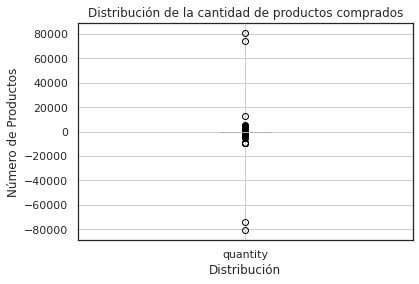

In [663]:
ecomerce.boxplot(column='quantity')
plt.xlabel('Distribución')
plt.ylabel('Número de Productos')
plt.title('Distribución de la cantidad de productos comprados')

plt.show(block=False)

In [664]:
ecomerce.query('quantity > 60000')

,invoice_no,invoice_cat,stock_code,stock_no,stock_cat,description,quantity,invoice_date,unit_price,customer_id
61619,541431,N,23166,23166,ITEMS,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346.0
540421,581483,N,23843,23843,ITEMS,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:15:00,2.08,16446.0


In [665]:
ecomerce.query('quantity < -60000')

,invoice_no,invoice_cat,stock_code,stock_no,stock_cat,description,quantity,invoice_date,unit_price,customer_id
61624,541433,C,23166,23166,ITEMS,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2019-01-16 10:17:00,1.04,12346.0
540422,581484,C,23843,23843,ITEMS,"PAPER CRAFT , LITTLE BIRDIE",-80995,2019-12-07 09:27:00,2.08,16446.0


Como se puede apreciar los valores +/- 60.000 productos son extremadamente excepcionales y de hecho corresponden a un error, la mayoría de los valores se concentran entre los +/- 20.000 productos. En el gráfico se alcanza a apreciar la línea verde cerca del cero. Vamos a hacer un zoom a este gráfico para ver dónde realmente se encuentran nuestros valores:

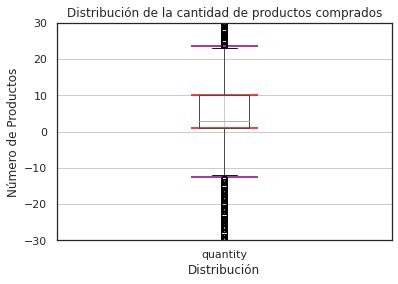

In [666]:
Q1_quantity = ecomerce['quantity'].quantile(0.25)
Q3_quantity = ecomerce['quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

ecomerce.boxplot(column='quantity')
plt.xlabel('Distribución')
plt.ylabel('Número de Productos')
plt.title('Distribución de la cantidad de productos comprados')

plt.ylim(-30, 30)
plt.hlines(y=[Q1_quantity, Q3_quantity], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q3_quantity+1.5*IQR_quantity), xmin=0.9, xmax=1.1, color='purple')
plt.hlines(y=(Q1_quantity-1.5*IQR_quantity), xmin=0.9, xmax=1.1, color='purple')
plt.show(block=False)

Como se puede apreciar, en realidad, las cantidades por sobre 23 productos son valores excepcionales, también podemos notar que hacia abajo cualquier valor por debajo de 12.5 es considerado excepcional.El primer cuantil en realidad está un poco por encima de 0 y el tercero cerca de 10 productos. La media está más inclinada hacia abajo.

Veamos en porcentaje a que corresponden estos valores:

In [667]:
print('El porcentaje de los valores excepcionales por sobre 23 items corresponden a:')
print(round((len(ecomerce.query('quantity > 23 and quantity < 60000')['quantity'])*100/len(ecomerce['quantity'])),2))
print()
print('El porcentaje de los valores excepcionales por sobre 1000 items corresponden a:')
print(round((len(ecomerce.query('quantity > 1000')['quantity'])*100/len(ecomerce['quantity'])),2))
print()
print('El porcentaje de los valores excepcionales por debajo de -12.5 items corresponden a:')
print(round((len(ecomerce.query('quantity < -12.5 and quantity < -60000')['quantity'])*100/len(ecomerce['quantity'])),2))

El porcentaje de los valores excepcionales por sobre 23 items corresponden a:
10.45

El porcentaje de los valores excepcionales por sobre 1000 items corresponden a:
0.02

El porcentaje de los valores excepcionales por debajo de -12.5 items corresponden a:
0.0


Como podemos notar, tenemos un 10.45% de datos que se encuentran por encima de 23 items en la columna cantidad, este porcentaje es bastante alto, y solo 0.02% se encuentran por sobre los 1000 items. Las cantidades negatívas corresponden a un 0% de los datos. No eliminaremos datos aún del dataset, porque los valores negativos podrían corresponder a corrección de valores positivos mal ingresados como se revisó anteriormente.

Revisemos ahora la columna 'unit_price':

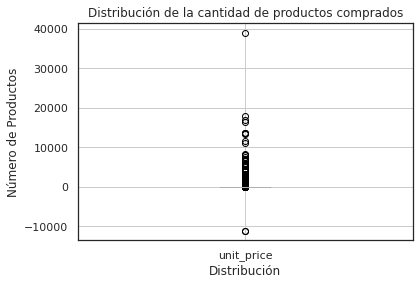

In [668]:
ecomerce.boxplot(column='unit_price')
plt.xlabel('Distribución')
plt.ylabel('Número de Productos')
plt.title('Distribución de la cantidad de productos comprados')

plt.show(block=False)

En el caso de los precios por unidad, notamos que hay varios valores excepcionales también. Vamos a hacer zoom al gráfico para detectarlos de mejor manera:

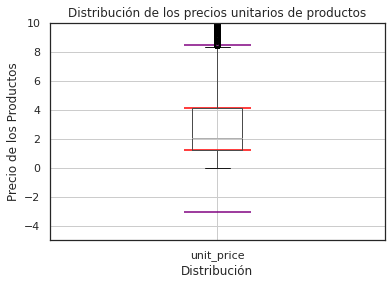

In [669]:
Q1_unit_price = ecomerce['unit_price'].quantile(0.25)
Q3_unit_price = ecomerce['unit_price'].quantile(0.75)
IQR_unit_price = Q3_unit_price - Q1_unit_price

ecomerce.boxplot(column='unit_price')
plt.xlabel('Distribución')
plt.ylabel('Precio de los Productos')
plt.title('Distribución de los precios unitarios de productos')

plt.ylim(-5, 10)
plt.hlines(y=[Q1_unit_price, Q3_unit_price], xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=(Q3_unit_price+1.5*IQR_unit_price), xmin=0.9, xmax=1.1, color='purple')
plt.hlines(y=(Q1_unit_price-1.5*IQR_unit_price), xmin=0.9, xmax=1.1, color='purple')
plt.show(block=False)

Como se puede apreciar, el bigote superior es de 8.45 dolares, todo los valores por encima son considerados excepcionales, y el bigote inferior es de -3, pero el primer cuantil es de 1.25. En este caso la media es de 2 dolares.

Veamos en porcentaje a que corresponden estos valores:

In [670]:
print('El porcentaje de los valores excepcionales por sobre 8.45 dolares corresponden a:')
print(round((len(ecomerce.query('unit_price > 8.45')['unit_price'])*100/len(ecomerce['unit_price'])),2))
print()
print('El porcentaje de los valores excepcionales por sobre 1000 items corresponden a:')
print(round((len(ecomerce.query('unit_price > 1000')['unit_price'])*100/len(ecomerce['unit_price'])),2))
print()
print('El porcentaje de los valores excepcionales negativoscorresponden a:')
print(round((len(ecomerce.query('unit_price < 0')['unit_price'])*100/len(ecomerce['unit_price'])),2))

El porcentaje de los valores excepcionales por sobre 8.45 dolares corresponden a:
7.31

El porcentaje de los valores excepcionales por sobre 1000 items corresponden a:
0.02

El porcentaje de los valores excepcionales negativoscorresponden a:
0.0


Como en el caso anterior, se da que tanto los valores negativos como los valores por encima de los 10000 dolares corresponden al 0% del dataset. Nuestro valores excepcionales por encima del bigote de 8.45 dolares corresponden a un 7.31% del total. Estudiaremos los valores ausentes y duplicados, y luego revisaremos de nuevo los valores atípicos.

### Revisión de Valores Ausentes <a id='datos_ausentes'></a>

In [671]:
print('El número de filas con datos ausentes en la columna "description" es:', ecomerce['description'].isna().sum())

El número de filas con datos ausentes en la columna "description" es: 1454


In [672]:
ecomerce[ecomerce['description'].fillna('x') == 'x']

,invoice_no,invoice_cat,stock_code,stock_no,stock_cat,description,quantity,invoice_date,unit_price,customer_id
622,536414,N,22139,22139,ITEMS,NaN,56,2018-11-29 11:52:00,0.0,NaN
1970,536545,N,21134,21134,ITEMS,NaN,1,2018-11-29 14:32:00,0.0,NaN
1971,536546,N,22145,22145,ITEMS,NaN,1,2018-11-29 14:33:00,0.0,NaN
1972,536547,N,37509,37509,ITEMS,NaN,1,2018-11-29 14:33:00,0.0,NaN
1987,536549,N,85226A,85226,ITEMS,NaN,1,2018-11-29 14:34:00,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
535322,581199,N,84581,84581,ITEMS,NaN,-2,2019-12-05 18:26:00,0.0,NaN
535326,581203,N,23406,23406,ITEMS,NaN,15,2019-12-05 18:31:00,0.0,NaN
535332,581209,N,21620,21620,ITEMS,NaN,6,2019-12-05 18:35:00,0.0,NaN
536981,581234,N,72817,72817,ITEMS,NaN,27,2019-12-06 10:33:00,0.0,NaN


In [673]:
print('Porcentaje de valores ausentes en la columna description:', 
      round(ecomerce['description'].isna().sum()*100/len(ecomerce['invoice_no']),2)
     )

Porcentaje de valores ausentes en la columna description: 0.27


Los valores ausentes en la columna de descripción corresponden al 0.27% del total de datos. Además revisando la tabla notamos que a primera vista los valores están en cero y además no tienen customer_id. Confirmemos esta teoría:

In [674]:
ecomerce[ecomerce['description'].fillna('x') == 'x']['unit_price'].sum()

0.0

In [675]:
ecomerce[ecomerce['description'].fillna('x') == 'x']['customer_id'].isna().sum()

1454

Efectivamente, los items sin descripción además no tienen monto ni número de cliente, como solo corresponde al 0.27% de los datos podemos eliminarlos sin afectar nuestro estudio.

In [676]:
ecomerce = ecomerce.dropna(subset=['description'])

Validación:

In [677]:
print('El número de filas con datos ausentes en la columna "description" ahora es:', ecomerce['description'].isna().sum())

El número de filas con datos ausentes en la columna "description" ahora es: 0


Nos enfocaremos ahora en la columna customer_id:

In [678]:
print('El número de filas con datos ausentes en la columna "customer_id" es:', ecomerce['customer_id'].isna().sum())

El número de filas con datos ausentes en la columna "customer_id" es: 133626


In [679]:
ecomerce[ecomerce['customer_id'].fillna('x') == 'x']

,invoice_no,invoice_cat,stock_code,stock_no,stock_cat,description,quantity,invoice_date,unit_price,customer_id
1443,536544,N,21773,21773,ITEMS,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,N,21774,21774,ITEMS,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,N,21786,21786,ITEMS,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,N,21787,21787,ITEMS,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN
1447,536544,N,21790,21790,ITEMS,VINTAGE SNAP CARDS,9,2018-11-29 14:32:00,1.66,NaN
...,...,...,...,...,...,...,...,...,...,...
541536,581498,N,85099B,85099,ITEMS,JUMBO BAG RED RETROSPOT,5,2019-12-07 10:26:00,4.13,NaN
541537,581498,N,85099C,85099,ITEMS,JUMBO BAG BAROQUE BLACK WHITE,4,2019-12-07 10:26:00,4.13,NaN
541538,581498,N,85150,85150,ITEMS,LADIES & GENTLEMEN METAL SIGN,1,2019-12-07 10:26:00,4.96,NaN
541539,581498,N,85174,85174,ITEMS,S/4 CACTI CANDLES,1,2019-12-07 10:26:00,10.79,NaN


In [680]:
print('Porcentaje de valores ausentes en la columna description:', 
      round(ecomerce['customer_id'].isna().sum()*100/len(ecomerce['invoice_no']),2)
     )

Porcentaje de valores ausentes en la columna description: 24.72


Casi un 25% de los customer_id no tienen datos. Este es un número demasiado grande. Intentaremos revisar si con el número de boleta podemos encontrar a los usuarios.

In [681]:
missing_ids = ecomerce[ecomerce['customer_id'].isnull()]['invoice_no']
has_ids = ecomerce[ecomerce['invoice_no'].isin(missing_ids) & ~ecomerce['customer_id'].isnull()]
print(f"Existen {len(has_ids)} registros con customer_id para los valores ausentes en la columna customer_id.")

Existen 0 registros con customer_id para los valores ausentes en la columna customer_id.


In [682]:
print(f"Tenemos {ecomerce[ecomerce['customer_id'].fillna('x') == 'x']['invoice_no'].nunique()} facturas sin customer id.")
print(f"Esto corresponde al {round(ecomerce[ecomerce['customer_id'].fillna('x') == 'x']['invoice_no'].nunique() * 100 / ecomerce['invoice_no'].nunique(),2)}% del total de facturas en nuestra base de datos.")
print(f"Las facturas sin customer id se encuentran entre las siguientes fechas {ecomerce[ecomerce['customer_id'].fillna('x') == 'x']['invoice_date'].min()} y {ecomerce[ecomerce['customer_id'].fillna('x') == 'x']['invoice_date'].max()}")

Tenemos 2256 facturas sin customer id.
Esto corresponde al 9.23% del total de facturas en nuestra base de datos.
Las facturas sin customer id se encuentran entre las siguientes fechas 2018-11-29 14:32:00 y 2019-12-07 10:26:00


En resumen, la columna 'description' tenía un 0.27% de valores ausentes y a todos les faltaba el precio y el customer ID, con lo cual se eliminaron esos valores.

Sin embargo, para la columna 'customer_id' los valores ausentes representan casi un 25% de los datos, revisamos si sería posible completar los datos perdidos en base a los números de factura pero no hubo coincidencias, por otro lado, estas facturas se encuentran entre noviembre 2018 y diciembre 2019, o sea distribuidas a lo largo de todo el periodo estudiado. Revisamos cuantas facturas únicas son y nos encontramos con 2256 facturas sin customer id, esto equivale a un 10% de las facturas emitidas. Tantos valores ausentes en la columna customer ID, podrían corresponder a clientes que no crearon cuenta en el sitio. Si bien no podremos conectar esas compras por customer ID, podremos de todas maneras considerar esas ventas para ver su evolución a través del tiempo o ver qué tan popular es un producto por número de ventas o monto comprado.

En la sección del cliente añadiremos una revisión más, que será comparar el monto promedio por invoice id para clientes con id vs clientes sin id.

### Revisión de Valores Duplicados <a id='datos_duplicados'></a>

In [683]:
print('Encontramos' ,ecomerce.duplicated().sum(), 'duplicados aparentemente.')

Encontramos 5268 duplicados aparentemente.


In [684]:
ecomerce[ecomerce.duplicated()]

,invoice_no,invoice_cat,stock_code,stock_no,stock_cat,description,quantity,invoice_date,unit_price,customer_id
517,536409,N,21866,21866,ITEMS,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
527,536409,N,22866,22866,ITEMS,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
537,536409,N,22900,22900,ITEMS,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
539,536409,N,22111,22111,ITEMS,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
555,536412,N,22327,22327,ITEMS,ROUND SNACK BOXES SET OF 4 SKULLS,1,2018-11-29 11:49:00,2.95,17920.0
...,...,...,...,...,...,...,...,...,...,...
541675,581538,N,22068,22068,ITEMS,BLACK PIRATE TREASURE CHEST,1,2019-12-07 11:34:00,0.39,14446.0
541689,581538,N,23318,23318,ITEMS,BOX OF 6 MINI VINTAGE CRACKERS,1,2019-12-07 11:34:00,2.49,14446.0
541692,581538,N,22992,22992,ITEMS,REVOLVER WOODEN RULER,1,2019-12-07 11:34:00,1.95,14446.0
541699,581538,N,22694,22694,ITEMS,WICKER STAR,1,2019-12-07 11:34:00,2.10,14446.0


Como se puede apreciar, los duplicado que encuentramos no lo son realmente, notamos que el 'stock_no' y la 'description' son distintas al menos en los datos que se presentan. Buscaremos duplicados exactos:

In [685]:
ecomerce[ecomerce.duplicated(keep=False)]

,invoice_no,invoice_cat,stock_code,stock_no,stock_cat,description,quantity,invoice_date,unit_price,customer_id
485,536409,N,22111,22111,ITEMS,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
489,536409,N,22866,22866,ITEMS,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
494,536409,N,21866,21866,ITEMS,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
517,536409,N,21866,21866,ITEMS,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
521,536409,N,22900,22900,ITEMS,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
...,...,...,...,...,...,...,...,...,...,...
541675,581538,N,22068,22068,ITEMS,BLACK PIRATE TREASURE CHEST,1,2019-12-07 11:34:00,0.39,14446.0
541689,581538,N,23318,23318,ITEMS,BOX OF 6 MINI VINTAGE CRACKERS,1,2019-12-07 11:34:00,2.49,14446.0
541692,581538,N,22992,22992,ITEMS,REVOLVER WOODEN RULER,1,2019-12-07 11:34:00,1.95,14446.0
541699,581538,N,22694,22694,ITEMS,WICKER STAR,1,2019-12-07 11:34:00,2.10,14446.0


De esta manera tenemos solo los duplicados exactos, eliminaremos estos de la base de datos:

In [686]:
ecomerce = ecomerce.drop_duplicates(keep='first')
print('Encontramos' ,ecomerce.duplicated().sum(), 'duplicados aparentemente.')

Encontramos 0 duplicados aparentemente.


### Corrección de valores atípicos  <a id='datos_atipicos'></a>

En base a los datos análisados hasta ahora, vamos a sacar de la columna 'quantity' solo los valores por sobre 60.000 y por debajo de -60.000, esto ya que los valores se suprimían y era claramente un error, sin embargo el resto de valores nos servirán para nuestro estudio así que los dejaremos aunque sean atípicos. 

In [687]:
ecomerce = ecomerce.query('quantity > -60000 and quantity < 60000')

Con respecto a la columna price, dejaremos los datos con los excepcionales, de esta manera podremos responder a preguntas como que clientes han realizado las compras más grandes. Veremos si las realizan a menudo o solo una vez. Con respecto a los negativos estos nos servirán para analizar las devoluciones y/o perdidas.

### Mejora de datos <a id='datos_mejorados'></a>

Lo primero que haremos es sacar el total gastado para cada item en la factura:

In [688]:
ecomerce['total_price'] = ecomerce['quantity'] * ecomerce['unit_price']

Ahora separaremos las fechas en columnas:

In [689]:
ecomerce['year'] = ecomerce['invoice_date'].dt.year
ecomerce['month'] = ecomerce['invoice_date'].dt.month
ecomerce['day'] = ecomerce['invoice_date'].dt.day

Finalmente, ordenaremos nuestro dataframe para facilitar la lectura de datos:

In [690]:
ecomerce = ecomerce.iloc[:,[0,1,2,3,4,5,6,8,10,7,11,12,13,9]]
ecomerce.head(1)

,invoice_no,invoice_cat,stock_code,stock_no,stock_cat,description,quantity,unit_price,total_price,invoice_date,year,month,day,customer_id
0,536365,N,85123A,85123,ITEMS,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,2018-11-29 08:26:00,2018,11,29,17850.0


In [691]:
ecomerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535183 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    535183 non-null  int64         
 1   invoice_cat   535183 non-null  category      
 2   stock_code    535183 non-null  object        
 3   stock_no      535183 non-null  int64         
 4   stock_cat     535183 non-null  category      
 5   description   535183 non-null  object        
 6   quantity      535183 non-null  int64         
 7   unit_price    535183 non-null  float64       
 8   total_price   535183 non-null  float64       
 9   invoice_date  535183 non-null  datetime64[ns]
 10  year          535183 non-null  int64         
 11  month         535183 non-null  int64         
 12  day           535183 non-null  int64         
 13  customer_id   401600 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(3), int64(6), object(2)
m

En esta sección se realizó un análisis exploratorio de datos en el cual se revisó el tamaño del dataset y se analizó a fondo las características y distribución de cada columna. También se estudió y corrigió los valores ausentes, atípicos y duplicados, y se buscaron oportunidades para mejorar el dataset agregando columnas pertinentes.

En total, el dataset tenía 7 columnas y 541,909 líneas. Se encontraron datos ausentes en las columnas "description" y "customer_id". También se revisaron las columnas "invoice_no" y "stock_code" se definián con el tipo object.

La columna "invoice_no" se analizó a fondo y se creó una nueva columna llamada "invoice_cat" que contiene solo strings. Se encontraron dos nomenclaturas distintas para analizar, y se revisó primero la categoría A, que correspondía a un ajuste por deuda. En el caso de la categoría C, se notó que correspondía a un descuento de algún tipo. Se eliminaron las letras de la columna "invoice_no" y se le asignó "N" (normal) a todos los valores nulos en la columna "invoice_cat".

Se creó una nueva columna llamada "stock_cat" para las letras en la columna "stock_code", y se unieron todas las descripciones "Unsaleable" y "destroyed" en la misma categoría llamada "DEST". Se pasaron todas las minúsculas a mayúsculas y se creó una columna llamada "stock_no" para guardar cada número individual. Las palabras más largas correspondían a vouchers y descuentos de envío o comisiones, por lo que se dejaron a parte. Además, se encontró el grupo DCGS que correspondía a un stock code completamente distinto a los de letras únicas, así que se mantuvo separado del resto.

En cuanto a la distribución de las columnas numéricas, se analizaron las columnas "quantity" y "unit_price", encontrando que ambas tenían distribuciones muy disparejas con valores extremos. Se decidió guardar estos valores para los estudios de clientes y productos.

## Estudio de Clientes <a id='estudio_clientes'></a>

En esta sección del proyecto, se llevarán a cabo diferentes análisis para entender mejor el comportamiento de los clientes y sus patrones de compra. Se utilizarán diversas métricas para responder a preguntas como cuántos clientes compran solo una vez, cuántos compran más de una vez, cuánto gastan en promedio y si el gasto promedio varía en ciertos meses. También se examinarán los productos más populares entre los clientes, qué clientes han realizado compras más grandes y si existen clientes que realizan compras regularmente y a menudo. Estos análisis nos proporcionarán información valiosa para la toma de decisiones y para la implementación de estrategias de marketing efectivas.

### Identificación de clientes que realizan una sola compra <a id='clientes_1'></a>

Lo primero que identificaremos son los clientes que han realizado solo una compra. Para lograr esto, primero contaremos el número de compras por cliente:

In [692]:
purchases_by_buyer = ecomerce.groupby("customer_id").count()["invoice_no"]
purchases_by_buyer.sort_values()

customer_id
15753.0       1
18141.0       1
18233.0       1
17948.0       1
16738.0       1
           ... 
14606.0    2759
12748.0    4459
14096.0    5128
14911.0    5898
17841.0    7812
Name: invoice_no, Length: 4371, dtype: int64

Filtraremos el DataFrame original para incluir solo los clientes que compraron una vez:

In [693]:
one_time_buyer = ecomerce[ecomerce["customer_id"].isin(purchases_by_buyer[purchases_by_buyer == 1].index)]

Ahora podemos contar el número de clientes que compraron solo una vez:

In [694]:
nbr_one_time_buyer = one_time_buyer["customer_id"].nunique()
total_buyers = purchases_by_buyer.index.nunique()

print("Hay", nbr_one_time_buyer, "clientes que han realizado solo una compra.")
print()
print(f"Esto corresponde al {round(nbr_one_time_buyer * 100 / total_buyers,2)}% del total de clientes.")

Hay 79 clientes que han realizado solo una compra.

Esto corresponde al 1.81% del total de clientes.


### Identificación de clientes que realizan múltiples compras <a id='clientes_2'></a>

De la misma forma, podemos concluir que los clientes que realizan más de una compra son:

In [695]:
multiple_purchases = ecomerce[ecomerce["customer_id"].isin(purchases_by_buyer[purchases_by_buyer != 1].index)]

In [696]:
nbr_multiple_buyer = multiple_purchases["customer_id"].nunique()
total_buyers = purchases_by_buyer.index.nunique()

print("Hay", nbr_multiple_buyer, "clientes que han realizado más de una compra.")
print()
print(f"Esto corresponde al {round(nbr_multiple_buyer * 100 / total_buyers,2)}% del total de clientes.")

Hay 4292 clientes que han realizado más de una compra.

Esto corresponde al 98.19% del total de clientes.


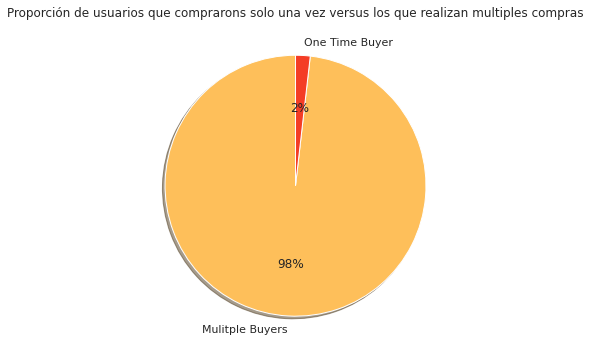

In [697]:
data = [nbr_multiple_buyer, nbr_one_time_buyer]
labels = ['Mulitple Buyers', 'One Time Buyer']
sns.set_palette(palette_2)

plt.figure(figsize=(12,6))
plt.title("Proporción de usuarios que comprarons solo una vez versus los que realizan multiples compras")
plt.pie(data, labels = labels, autopct='%.0f%%', shadow=True, startangle=90)
plt.show()

Hemos comprobado que la mayoría de nuestros clientes compran más de una vez. Es por esta razón que realizaremos un análisis de cohortes.

### Análisis del número de nuevos clientes por mes <a id='clientes_3'></a>

Lo primero que buscaremos es cuando los clientes realizaron su primera compra por mes:

In [698]:
first_purchase = ecomerce.groupby('customer_id').agg({'invoice_date':'min'}).reset_index()
first_purchase.columns = ['customer_id','first_purchase_month']
first_purchase['first_purchase_month'] = first_purchase['first_purchase_month'].astype('datetime64[M]')
first_purchase.head()

,customer_id,first_purchase_month
0,12347.0,2018-12-01
1,12348.0,2018-12-01
2,12349.0,2019-11-01
3,12350.0,2019-01-01
4,12352.0,2019-02-01


Ahora calcularemos el número de nuevos clientes por mes:

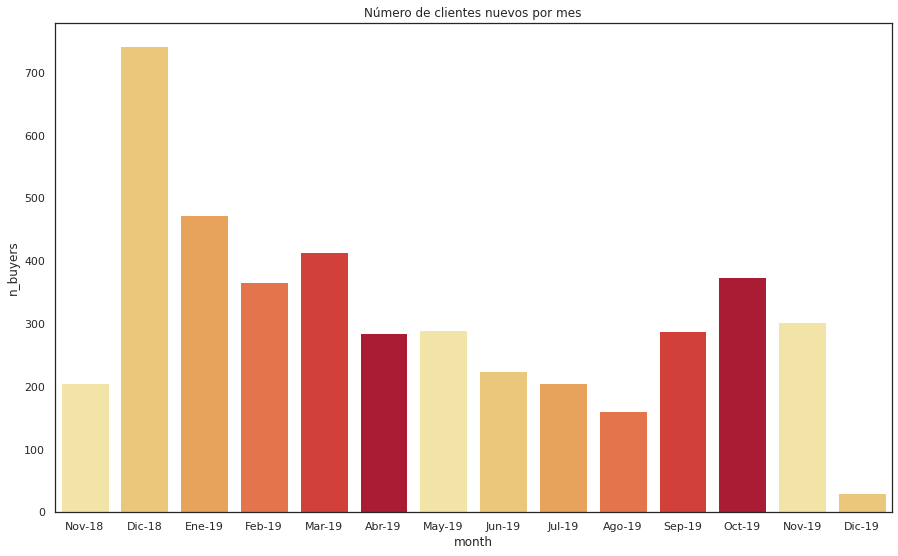

In [699]:
cohort_sizes = first_purchase.groupby('first_purchase_month').agg({'customer_id':'nunique'}).reset_index()
cohort_sizes.columns = ['first_purchase_month', 'n_buyers']

month = ['Nov-18', 'Dic-18', 'Ene-19', 'Feb-19', 'Mar-19', 'Abr-19', 'May-19', 'Jun-19', 'Jul-19', 'Ago-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dic-19']
cohort_sizes['month'] = month

plt.figure(figsize=(15, 9))
plt.title('Número de clientes nuevos por mes')
plt.xlabel('Mes')
plt.ylabel('Número de clientes')
sns.barplot(data=cohort_sizes, x='month', y='n_buyers', palette = palette)
plt.show()

Como se puede apreciar, en diciembre 2018 tuvimos muchos compradores nuevos, más de 700. Sin embargo, en 2019 no se logró superar los 500 nuevos compradores. Los mejores meses fueron enero, marzo y octubre. Mientrás que los peores meses fueron junio, julio y agosto. No se contabilizan noviembre 2018 y diciembre 2019 ya que no son meses completos.

### Análisis del gasto promedio de los clientes <a id='clientes_4'></a>

Calcularemos el gasto promedio de cada cliente sumando los montos de todas las compras realizadas por ese cliente y dividiendo el total entre el número de compras realizadas.

In [700]:
grouped_by_buyer = ecomerce.groupby('customer_id')
total_spent_by_buyer = grouped_by_buyer['total_price'].sum()
purchases_by_buyer = grouped_by_buyer['invoice_no'].count()

average_spending_by_buyer = total_spent_by_buyer / purchases_by_buyer

print(f"El gasto promedio de los clientes es de {round(average_spending_by_buyer.mean(),2)} dolares.")

El gasto promedio de los clientes es de 28.88 dolares.


Vamos a analizar más a fondo este gasto promedio tomando a nuestros cohortes y analizando su gasto mensual, para ello agregaremos los meses de la primera compra con nuestra tabla ecomerce:

In [701]:
ecomerce_ = ecomerce
ecomerce_['month'] = ecomerce_['invoice_date'].astype('datetime64[M]')
ecomerce_ = pd.merge(ecomerce, first_purchase, on='customer_id')
ecomerce_.head()

,invoice_no,invoice_cat,stock_code,stock_no,stock_cat,description,quantity,unit_price,total_price,invoice_date,year,month,day,customer_id,first_purchase_month
0,536365,N,85123A,85123,ITEMS,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2018-11-29 08:26:00,2018,2018-11-01,29,17850.0,2018-11-01
1,536365,N,71053,71053,ITEMS,WHITE METAL LANTERN,6,3.39,20.34,2018-11-29 08:26:00,2018,2018-11-01,29,17850.0,2018-11-01
2,536365,N,84406B,84406,ITEMS,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2018-11-29 08:26:00,2018,2018-11-01,29,17850.0,2018-11-01
3,536365,N,84029G,84029,ITEMS,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2018-11-29 08:26:00,2018,2018-11-01,29,17850.0,2018-11-01
4,536365,N,84029E,84029,ITEMS,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2018-11-29 08:26:00,2018,2018-11-01,29,17850.0,2018-11-01


Ahora vamos a agrupar la tabla de pedidos por mes de la primera compra y mes de la compra y totalizar los ingresos:

In [702]:
cohorts = ecomerce_.groupby(['first_purchase_month', 'month']).agg({'total_price':'sum'}).reset_index()
cohorts.head()

,first_purchase_month,month,total_price
0,2018-11-01,2018-11-01,91523.73
1,2018-11-01,2018-12-01,92048.74
2,2018-11-01,2019-01-01,88117.96
3,2018-11-01,2019-02-01,60801.69
4,2018-11-01,2019-03-01,84650.79


Calcularemos entonces el valor promedio por comprador por cohorte:

In [703]:
cohort_sizes = cohort_sizes.drop('month', axis=1)
report = pd.merge(cohort_sizes, cohorts, on='first_purchase_month')
report.head()

,first_purchase_month,n_buyers,month,total_price
0,2018-11-01,206,2018-11-01,91523.73
1,2018-11-01,206,2018-12-01,92048.74
2,2018-11-01,206,2019-01-01,88117.96
3,2018-11-01,206,2019-02-01,60801.69
4,2018-11-01,206,2019-03-01,84650.79


Crearemos un margen de beneficio para poder calcular el LTV (Lifetime Value) y agregaremos la edad de cada cohorte para simplificar la lectura de datos más adelante:

In [704]:
margin_rate = 1

In [705]:
report['gp'] = report['total_price'] * margin_rate
report['age'] = (
    report['month'] - report['first_purchase_month']
) / np.timedelta64(1,'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_purchase_month,n_buyers,month,total_price,gp,age
0,2018-11-01,206,2018-11-01,91523.73,91523.73,0
1,2018-11-01,206,2018-12-01,92048.74,92048.74,1
2,2018-11-01,206,2019-01-01,88117.96,88117.96,2
3,2018-11-01,206,2019-02-01,60801.69,60801.69,3
4,2018-11-01,206,2019-03-01,84650.79,84650.79,4


In [706]:
report['ltv'] = report['gp'] / report['n_buyers']

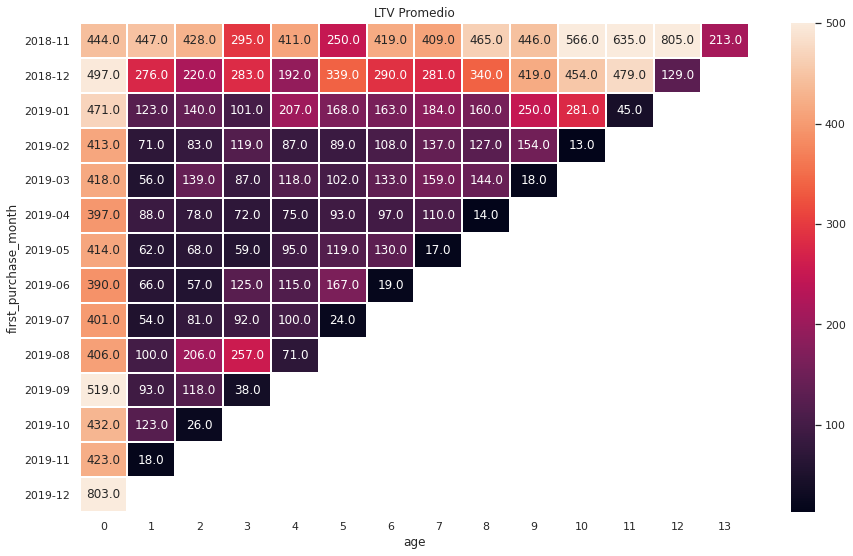

In [707]:
output = report.pivot_table(
    index='first_purchase_month', columns='age', values='ltv', aggfunc='mean'
).round()

plt.figure(figsize=(15, 9))
plt.title('LTV Promedio')
sns.heatmap(
    output,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='white',
    vmax=500,
    yticklabels=output.index.strftime('%Y-%m'),
)
plt.show()

El **LTV** (lifetime value en inglés) es el valor "de vida" del cliente, o sea la cantidad total de dinero que un cliente aporta a la empresa en promedio al realizar compras. Entonces podemos verificar por ejemplo:

In [708]:
ltv_201811 = output.loc['2018-11-01'].sum()

print('En promedio, cada cliente de la primera cohorte generó', ltv_201811, 'en ingresos durante su ciclo de vida de un año.')

En promedio, cada cliente de la primera cohorte generó 6233.0 en ingresos durante su ciclo de vida de un año.


In [709]:
ltv_201901 = output.loc['2019-01-01'].sum()

print('En promedio, cada cliente de la tercera cohorte generó', ltv_201901, 'en ingresos durante su ciclo de vida de un año.')

En promedio, cada cliente de la tercera cohorte generó 2293.0 en ingresos durante su ciclo de vida de un año.


Dejando de lado, noviembre 2018 y diciembre 2019, los clientes en general hacen un gasto del orden de los 431.75 dolares la primera vez que acceden a la página. En septiembre 2019 partieron mucho mejor con 519 dolares. Sin embargo, en los meses siguientes el gasto promedio baja drásticamente, en general por debajo de los 300 dolares. El mejor mes, fue diciembre 2018 que en el primer mes obtuvo 497 y solo bajó por debajo de los 200 dólares en el doceavo mes, con muchos meses por sobre los 300 dólares.

### Variación de las cantidades promedio por mes <a id='clientes_5'></a>

Vamos a revisar como evoluciona mes a mes en nuestros cohortes la cantidad de items comprados:

In [710]:
cohorts_ = ecomerce_.groupby(['first_purchase_month', 'month']).agg({'quantity':'sum'}).reset_index()
cohorts_.head()

,first_purchase_month,month,quantity
0,2018-11-01,2018-11-01,44721
1,2018-11-01,2018-12-01,51502
2,2018-11-01,2019-01-01,49029
3,2018-11-01,2019-02-01,40687
4,2018-11-01,2019-03-01,54196


In [711]:
report_ = pd.merge(cohort_sizes, cohorts_, on='first_purchase_month')
report_.head()

,first_purchase_month,n_buyers,month,quantity
0,2018-11-01,206,2018-11-01,44721
1,2018-11-01,206,2018-12-01,51502
2,2018-11-01,206,2019-01-01,49029
3,2018-11-01,206,2019-02-01,40687
4,2018-11-01,206,2019-03-01,54196


In [712]:
report_['ltq'] = report_['quantity'] / report_['n_buyers']
report_['age'] = (
    report_['month'] - report_['first_purchase_month']
) / np.timedelta64(1,'M')
report_['age'] = report_['age'].round().astype('int')

report_.head()

,first_purchase_month,n_buyers,month,quantity,ltq,age
0,2018-11-01,206,2018-11-01,44721,217.092233,0
1,2018-11-01,206,2018-12-01,51502,250.009709,1
2,2018-11-01,206,2019-01-01,49029,238.004854,2
3,2018-11-01,206,2019-02-01,40687,197.509709,3
4,2018-11-01,206,2019-03-01,54196,263.087379,4


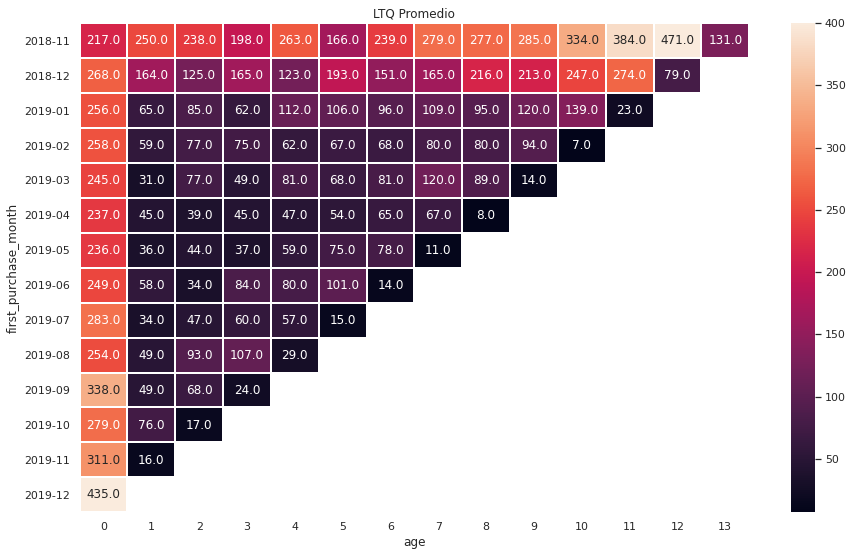

In [713]:
output_ = report_.pivot_table(
    index='first_purchase_month', columns='age', values='ltq', aggfunc='mean'
).round()

plt.figure(figsize=(15, 9))
plt.title('LTQ Promedio')
sns.heatmap(
    output_,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='white',
    vmax=400,
    yticklabels=output.index.strftime('%Y-%m'),
)
plt.show()

El **LTQ** (lifetime Quantity en inglés) es la cantidad promedio de productos del cliente, o sea la cantidad total de productos que un cliente compró en promedio al realizar cada compra. Entonces podemos verificar por ejemplo:

In [714]:
ltq_201811 = output_.loc['2018-11-01'].sum()

print('En promedio, cada cliente de la primera cohorte compró', ltq_201811, 'productos durante su ciclo de vida de un año.')

En promedio, cada cliente de la primera cohorte compró 3732.0 productos durante su ciclo de vida de un año.


In [715]:
ltq_201901 = output_.loc['2019-01-01'].sum()

print('En promedio, cada cliente de la tercera cohorte compró', ltq_201901, 'productos durante su ciclo de vida de un año.')

En promedio, cada cliente de la tercera cohorte compró 1268.0 productos durante su ciclo de vida de un año.


Dejando de lado, noviembre 2018 y diciembre 2019, los clientes en general compran del orden de 268 productos la primera vez que acceden a la página. En septiembre 2019 partieron mucho mejor con 338 productos. Sin embargo, en los meses siguientes el número de productos baja drásticamente, en general por debajo de los 100 productos. El mejor mes, fue diciembre 2018.

### Productos más populares entre los clientes <a id='clientes_6'></a>

Buscaremos cuales son los productos más populares (los más vendidos), mostraremos el top 10.

In [716]:
popular_products = ecomerce.groupby('stock_no')['quantity'].sum().sort_values(ascending=False).head(10)
popular_products

stock_no
85099    77915
22197    56427
84077    53751
85123    39103
84879    36122
21212    36016
23084    30265
22492    26437
22616    26299
21977    24719
Name: quantity, dtype: int64

Vamos a mejorar la visualización de estos datos:

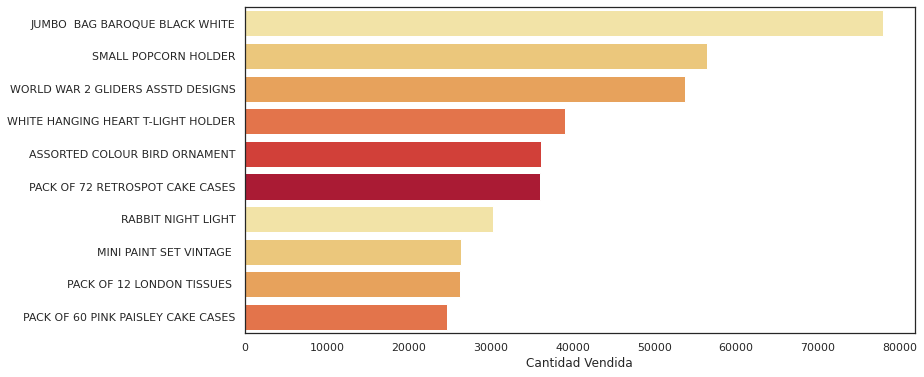

In [717]:
product_names = []
for stock_code in popular_products.index:
    product_names.append(ecomerce.loc[ecomerce['stock_no'] == stock_code, 'description'].iloc[0])
    
plt.figure(figsize=(12, 6))    
sns.barplot(x=popular_products.values, y=product_names, palette = palette)
plt.xlabel('Cantidad Vendida')
plt.show()

El producto más vendido con diferencia es la "Jumbo Bag Baroque Black White", seguida por el "Small Popcorn Holder" y los "Word War 2 Glders ASSTD designs".

### Clientes que realizan las compras más grandes <a id='clientes_7'></a>

Revisaremos quienes son nuestros mejores clientes, o sea, los que han realizado las compras más grandes en monto:

In [718]:
total_spent_by_buyer = ecomerce.groupby('customer_id')['total_price'].sum()

sorted_buyers = total_spent_by_buyer.sort_values(ascending=False)

n = 3 # número de clientes a seleccionar
top_buyers = sorted_buyers.head(n)


print("Los clientes con las compras más grandes son:")
print(top_buyers)

Los clientes con las compras más grandes son:
customer_id
14646.0    279489.02
18102.0    256438.49
17450.0    187322.17
Name: total_price, dtype: float64


Nuestros mejores clientes son el customer id 14646 (279.489,02 dolares), 18102 (256.438,49 dolares) y 17450 (187.322,17 dolares).

### Análisis de la frecuencia de compras de los clientes <a id='clientes_8'></a>

En este punto, buscaremos la tasa de retención de nuestros clientes. Nos interesa saber si tenemos clientes leales o si se tienden a ir bastante rápido. Para ello primero agregaremos a nuestro dataset ecomerce_ una nueva columna con los meses de vida de cada cohorte: 

In [719]:
ecomerce_['cohort_lifetime'] = (
    ecomerce_['month'] - ecomerce_['first_purchase_month']
)

ecomerce_['cohort_lifetime'] = ecomerce_[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')

ecomerce_['cohort_lifetime'] = ecomerce_['cohort_lifetime'].astype(int)

Agruparemos entonces los datos por cohorte y ciclo de vida. Encontraremos el número de usuarios activos en un cierto mes del ciclo de vida para cada cohorte.

In [720]:
cohorts_2 = (
    ecomerce_.groupby(['first_purchase_month', 'cohort_lifetime'])
    .agg({'customer_id':'nunique'})
    .reset_index()
)

Vamos a buscar el número inicial de usuarios/as en la cohorte observando el mes 0:

In [721]:
initial_users_count = cohorts_2[cohorts_2['cohort_lifetime'] == 0][
    ['first_purchase_month', 'customer_id']
]

initial_users_count = initial_users_count.rename(
    columns={'customer_id':'cohort_users'}
)

initial_users_count.head()

,first_purchase_month,cohort_users
0,2018-11-01,206
12,2018-12-01,742
22,2019-01-01,474
33,2019-02-01,367
43,2019-03-01,415


Vamos a unir los datos de las cohortes con el número inicial de usuarios/as en la cohorte.

In [722]:
cohorts_2 = cohorts_2.merge(initial_users_count, on='first_purchase_month')

Ahora calcularemos la tasa de retención:

In [723]:
cohorts_2['retention'] = cohorts_2['customer_id'] / cohorts_2['cohort_users']
cohorts_2.head()

,first_purchase_month,cohort_lifetime,customer_id,cohort_users,retention
0,2018-11-01,0,206,206,1.000000
1,2018-11-01,2,82,206,0.398058
2,2018-11-01,3,96,206,0.466019
3,2018-11-01,4,79,206,0.383495
4,2018-11-01,5,83,206,0.402913


Compilaremos una tabla dínamica y con ella un mapa de calor para visualizar mejor los datos:

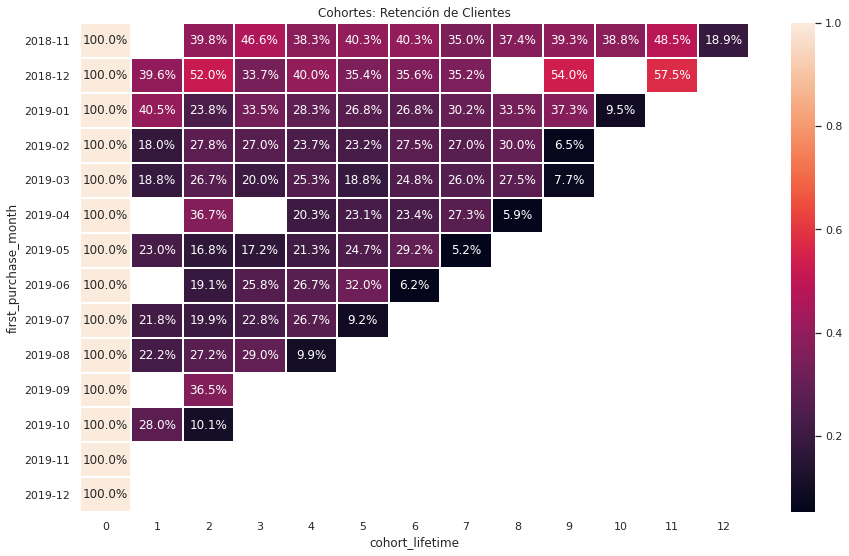

In [724]:
retention_pivot = cohorts_2.pivot_table(
    index='first_purchase_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)

sns.set(style='white')
plt.figure(figsize=(15,9))
plt.title('Cohortes: Retención de Clientes')
sns.heatmap(
    retention_pivot,
    annot=True,
    fmt='.1%',
    linewidth=1,
    linecolor='white',
    yticklabels=output.index.strftime('%Y-%m'),
)
plt.show()

Como se puede apreciar la tasa de retención de nuestros clientes en diciembre 2018 fue buena, llegando a tener un 57.5% de clientes retornando 11 meses después. Sin embargo la tasa de retención en 2019 bajó manteniendos por debajo del 40%, y a medida que avanzan los meses cada vez más baja. Otro, punto a destacar son los númerosos espacios en blanco en las cohortes de noviembre y diciembre 2018, y abril, junio y octubre en el 2019. 

### Comparación de clientes con y sin ID <a id='clientes_9'></a>

En esta sección revisaremos como se comportan los cliente con ID, que son los que se han enrolado en la página, versus los clientes sin id. Para ellos compararemos los gastos medios de ambos grupos:

In [725]:
customer_with_id = ecomerce.dropna(subset=['customer_id'])
customer_without_id = ecomerce.query('stock_cat == "ITEMS" or stock_cat == "DCGS"')
customer_without_id = customer_without_id[customer_without_id['customer_id'].isnull()]

avg_price_with_id = customer_with_id.groupby('invoice_no')['total_price'].mean()
avg_price_without_id = customer_without_id.groupby('invoice_no')['total_price'].mean()

print("Promedio de total_price para clientes con ID:", round(avg_price_with_id.mean(),2),"dolares.")
print()
print("Promedio de total_price para clientes sin ID:", round(avg_price_without_id.mean(),2),"dolares.")

Promedio de total_price para clientes con ID: 34.39 dolares.

Promedio de total_price para clientes sin ID: -6.45 dolares.


El resultado indica que los clientes con ID tienen un promedio de gasto total por factura de 34.39 dólares, mientras que los clientes sin ID tienen un promedio de gasto total por factura de -6.45 dólares. Es importante destacar que el valor negativo en el promedio de los clientes sin ID puede deberse a un error en la captura de datos o a devoluciones de artículos, pero es difícil de determinar sin más información.

En cualquier caso, se puede concluir que los clientes con ID tienen un mayor gasto promedio que los clientes sin ID, lo que puede deberse a que los clientes que se registran tienen una mayor fidelización o compromiso con la marca y, por lo tanto, son más propensos a realizar compras más grandes.

Revisaremos rápidamente el comportamiento de los clientes sin ID en cuanto a devoluciones:

In [726]:
customer_without_id['invoice_cat'].value_counts(normalize=True)

N    0.997778
C    0.002200
A    0.000023
Name: invoice_cat, dtype: float64

In [727]:
print('Los clientes sin ID suman en total', round(customer_without_id.query('invoice_cat == "C"')['total_price'].sum(),2),'dolares en devoluciones.')

Los clientes sin ID suman en total -41887.22 dolares en devoluciones.


In [728]:
customer_with_id['invoice_cat'].value_counts(normalize=True)

N    0.977913
C    0.022087
A    0.000000
Name: invoice_cat, dtype: float64

In [729]:
print('Los clientes con ID suman en total', round(customer_with_id.query('invoice_cat == "C"')['total_price'].sum(),2),'dolares en devoluciones.')

Los clientes con ID suman en total -363036.27 dolares en devoluciones.


En la sección de estudio de clientes del proyecto se realizaron diferentes análisis para comprender el comportamiento y patrones de compra de los clientes. Se utilizaron diversas métricas para responder preguntas como cuántos clientes compran solo una vez, cuántos compran más de una vez, cuánto gastan en promedio y si el gasto promedio varía en ciertos meses. También se examinaron los productos más populares entre los clientes, qué clientes realizaron compras más grandes y si existen clientes que realizan compras regularmente y a menudo.

Se descubrió que el 98,19% de los clientes realizan más de una compra y solo el 1,81% realizan una sola compra. En diciembre 2018 tuvimos muchos compradores nuevos, más de 700. Sin embargo, en 2019 no se logró superar los 500 nuevos compradores. Los mejores meses fueron enero, marzo y octubre. Mientrás que los peores meses fueron junio, julio y agosto. Además, el gasto promedio de los clientes en su primera compra es de 431,75 dólares. En septiembre 2019 los clientes promediaron 519 dólares. Sin embargo, se observó que en los meses siguientes a su primera compra, el gasto promedio por cliente baja drásticamente, en general por debajo de los 300 dólares. El mejor mes, fue diciembre 2018 que en el primer mes obtuvo 497 y solo bajó por debajo de los 200 dólares en el doceavo mes, con muchos meses por sobre los 300 dólares. Otro punto importante es que a lo largo de un ciclo de vida de un año, los clientes de la primera cohorte generaron mucho más ingresos que las cohortes succesivas. 

En cuanto a la cantidad de productos vendidos, los clientes en general compran del orden de 268 productos la primera vez que acceden a la página. Sin embargo, en los meses siguientes el número de productos baja drásticamente, en general por debajo de los 100 productos. El mejor primer mes fue septiembre 2019, y la mejor cohorte fue diciembre 2018 como con los ingresos. 

El producto más vendido es la "Jumbo Bag Baroque Black White", seguido por el "Small Popcorn Holder" y los "Word War 2 Glders ASSTD designs". Los clientes que realizaron las compras más grandes fueron el customer_id 14646 (279.489,02 dólares), 18102 (256.438,49 dólares) y 17450 (187.322,17 dólares).

Se observó que la tasa de retención de diciembre 2018 fue buena, llegando a tener un 57.5% de clientes retornando 11 meses después. Sin embargo, la tasa de retención en 2019 bajó manteniendos por debajo del 40%, y a medida que avanzan los meses cada vez más baja. En los meses de noviembre y diciembre 2018, y abril, junio y octubre en el 2019, notamos los segundos meses sin retorno de clientes.

Econtramos una diferencia grande de gastos en clientes sin ID versus clientes con ID. Sin embargo, pudimos observar que tanto los clientes con ID como los clientes sin ID presentan un porcentaje de devoluciones similar, lo que indica que las devoluciones no son la razón principal detrás del bajo promedio de gasto de los clientes sin ID. Sin embargo, es importante tener en cuenta que el porcentaje de devoluciones es muy bajo en ambos casos, lo que sugiere que la calidad de los productos es alta y que la política de devoluciones de la empresa puede ser efectiva.

## Estudio de Productos <a id='estudio_productos'></a>

En la sección de estudio de productos, nos enfocaremos en analizar diferentes aspectos relacionados con los productos vendidos por la empresa. A través de diversas métricas, trataremos de responder a preguntas como cuáles son los productos más populares, cuáles son los menos vendidos, si los precios de los productos han variado a lo largo del tiempo y si existen patrones en las ventas de ciertos productos durante ciertos meses del año. Además, también nos interesará analizar si hay productos que suelen venderse juntos con frecuencia, lo que nos permitirá mejorar la estrategia de marketing y ventas. Finalmente, también nos enfocaremos en determinar qué productos son más populares entre los clientes habituales para mejorar la estrategia de fidelización de clientes.

Nuestro análisis se realizará, observando en primera instancia por separado los invoices "normales" (N) y los invoices "C", para luego notar si hay variaciones con respecto a los números totales. Además filtraremos nuestros dataset para tomar los meses completos, o sea desde diciembre 2018 hasta noviembre 2019.

In [730]:
ecomerce.head(1)

,invoice_no,invoice_cat,stock_code,stock_no,stock_cat,description,quantity,unit_price,total_price,invoice_date,year,month,day,customer_id
0,536365,N,85123A,85123,ITEMS,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,2018-11-29 08:26:00,2018,2018-11-01,29,17850.0


In [731]:
ecomerce_full_months = ecomerce.query('month != "2018-11-01" and month != "2019-12-01"')

In [732]:
ecomerce_n = ecomerce_full_months.query('invoice_cat == "N"')

In [733]:
ecomerce_c = ecomerce_full_months.query('invoice_cat == "C"')

### Evolución de precios por mes <a id='productos_1'></a>

Lo primero que haremos es analizar la evolución de los precios por mes. Para realizar esto agruparemos las transacciones por mes y calcularemos el precio promedio.

In [734]:
monthly_prices_f = ecomerce_full_months.groupby('month')['total_price'].mean()
monthly_prices_f

month
2018-12-01    17.481047
2019-01-01    16.111067
2019-02-01    18.365760
2019-03-01    18.814904
2019-04-01    16.552042
2019-05-01    19.572307
2019-06-01    18.860705
2019-07-01    17.295465
2019-08-01    20.014542
2019-09-01    20.040134
2019-10-01    18.008542
2019-11-01    17.616975
Name: total_price, dtype: float64

In [735]:
monthly_prices_n = ecomerce_n.groupby('month')['total_price'].mean()
monthly_prices_c = ecomerce_c.groupby('month')['total_price'].mean()

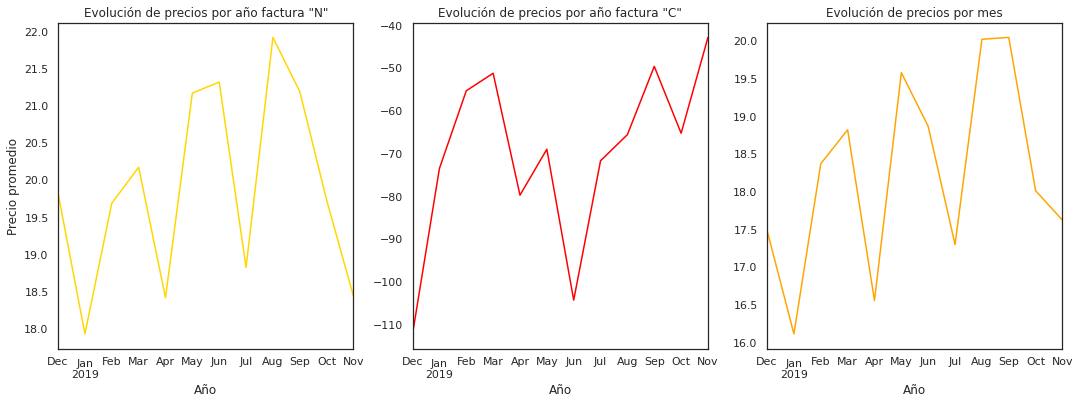

In [736]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))

monthly_prices_n.plot(kind='line', x='month', y='price', color='gold', ax=ax1)
ax1.set_title('Evolución de precios por año factura "N"')
ax1.set_xlabel('Año')
ax1.set_ylabel('Precio promedio')

monthly_prices_c.plot(kind='line', x='month', y='price', color='red', ax=ax2)
ax2.set_title('Evolución de precios por año factura "C"')
ax2.set_xlabel('Año')

monthly_prices_f.plot(kind='line', x='month', y='price', color='orange', ax=ax3)
ax3.set_title('Evolución de precios por mes')
ax3.set_xlabel('Año')

plt.show()

Es importante notar que los precios de las facturas "C" están en los números negativos, no así los otros dos. Otra visualización de lo mismo sería la siguiente:

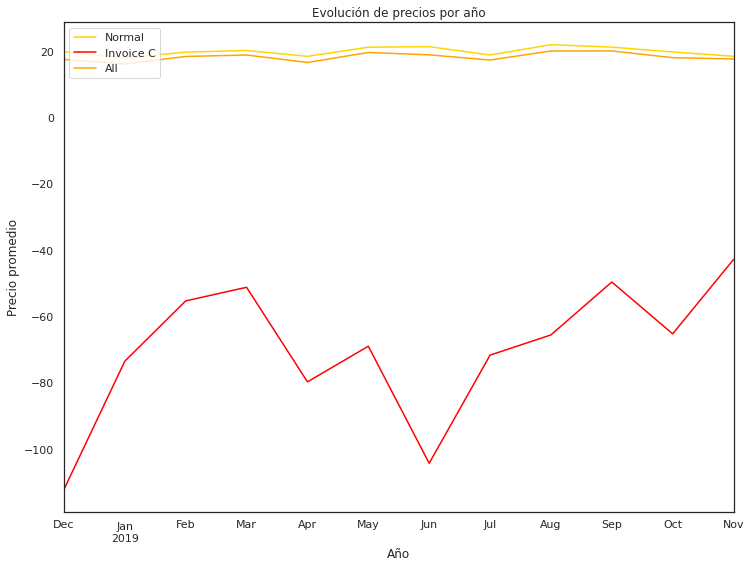

In [737]:
plt.figure(figsize=(12, 9))
monthly_prices_n.plot(kind='line', x='month', y='price', color='gold', label='Normal')
monthly_prices_c.plot(kind='line', x='month', y='price', color='red', label='Invoice C')
monthly_prices_f.plot(kind='line', x='month', y='price', color='orange', label='All')
plt.title('Evolución de precios por año')
plt.xlabel('Año')
plt.ylabel('Precio promedio')
plt.legend(loc='upper left')
plt.show()

Podemos ver que los precios promedio para las facturas normales son más altos en los meses de mayo, junio, agosto y septiembre, y más bajos en los meses de enero, abril, julio y noviembre. El rango de precios promedio para esta categoría, por mes va desde 17.92 en enero hasta 21.91 en agosto, lo que significa que hay una variación significativa en los precios a lo largo del año.

Los precios para las facturas "C", son negativos. Los peores meses fueron diciembre 2018 y junio 2019. Lo meses menos malos fueron septiembre y noviembre 2019.

Si analizamos, las facturas promedios sin filtro. Observamos obviamente una caída en todos los meses, bajando el rango de precios a un mínimo de 16.11 en enero y un máximo de 20.04 en septiembre. Notamos que las facturas más altas siguen siendo en agosto y septiembre (aunque agosto tuvo grandes perdidas), pero mayo y junio bajan a estar en el promedio. Los meses más bajos pasan a ser enero y abril, seguidos de julio 2019 y diciembre 2018.

### Ranking de los productos más vendidos <a id='productos_2'></a>

Analizaremos ahora la cantidad de veces que se han vendido los productos para encontrar los más vendidos. Para esta sección utilizaremos nuestro dataset filtrado a los invoices normales:

In [738]:
ecomerce_n.head(1)

,invoice_no,invoice_cat,stock_code,stock_no,stock_cat,description,quantity,unit_price,total_price,invoice_date,year,month,day,customer_id
5217,536847,N,22155,22155,ITEMS,STAR DECORATION RUSTIC,48,0.42,20.16,2018-12-01 09:31:00,2018,2018-12-01,1,17135.0


In [739]:
df_products = ecomerce_n[['stock_no', 'description']].drop_duplicates(subset='stock_no')
product_sales = ecomerce_n.groupby('stock_no')['quantity'].sum().reset_index()
product_sales = product_sales.merge(df_products, on='stock_no', how='left')

In [740]:
top_10_products = product_sales.sort_values(by='quantity', ascending=False).head(10)
top_10_products = top_10_products.sort_values(by='quantity')

print('Los 10 productos más vendidos son:')
top_10_products

Los 10 productos más vendidos son:


,stock_no,quantity,description
903,21977,24339,PACK OF 60 PINK PAISLEY CAKE CASES
1464,22616,25102,PACK OF 12 LONDON TISSUES
1346,22492,26017,MINI PAINT SET VINTAGE
1916,23084,26983,RABBIT NIGHT LIGHT
2940,84879,34737,ASSORTED COLOUR BIRD ORNAMENT
413,21212,35382,PACK OF 72 RETROSPOT CAKE CASES
3055,85123,40237,WHITE HANGING HEART T-LIGHT HOLDER
2754,84077,50614,WORLD WAR 2 GLIDERS ASSTD DESIGNS
1082,22197,51984,SMALL POPCORN HOLDER
3043,85099,78081,JUMBO BAG RED RETROSPOT


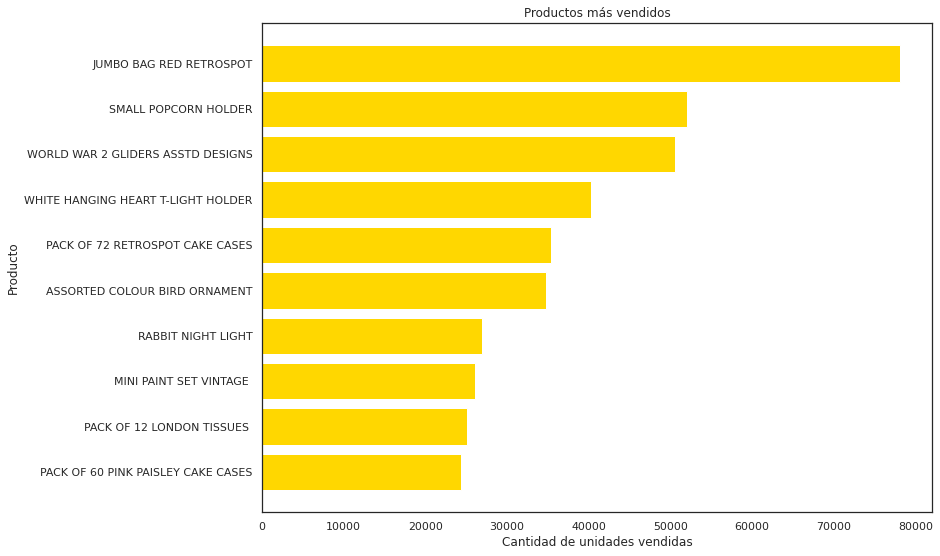

In [741]:
plt.figure(figsize=(12, 9))
plt.barh(
    top_10_products['description'], top_10_products['quantity'], color='gold'
)
plt.xlabel('Cantidad de unidades vendidas')
plt.ylabel('Producto')
plt.title('Productos más vendidos')
plt.show()

Como se puede apreciar, la bolsa 'Jumbo Bag Red Retrospot' corresponde al producto más vendido con diferencia más de 78000 unidades vendidas! Le sigue 'Small Popcorn Holder' con 51984 unidadeds vendidas, y luego los 'World War 2 Gliders ASSTD Designs' con 50614 unidades vendidas. Vamos a analizar si esto varía mes a mes:

In [742]:
df_products_monthy = ecomerce_n[['month','stock_no', 'description']].drop_duplicates(subset='stock_no')
product_sales_monthy = ecomerce_n.groupby(['month','stock_no'])['quantity'].sum().reset_index()
product_sales_monthy = product_sales_monthy.merge(df_products, on='stock_no', how='left')

In [743]:
idx = product_sales_monthy.groupby('month')['quantity'].idxmax()

top_products_monthly = product_sales_monthy.loc[idx, ['month', 'stock_no', 'description', 'quantity']]
top_products_monthly

,month,stock_no,description,quantity
356,2018-12-01,21212,PACK OF 72 RETROSPOT CAKE CASES,3406
4421,2019-01-01,85099,JUMBO BAG RED RETROSPOT,6030
6576,2019-02-01,85099,JUMBO BAG RED RETROSPOT,4372
8764,2019-03-01,85099,JUMBO BAG RED RETROSPOT,9809
10756,2019-04-01,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,7935
11960,2019-05-01,22197,SMALL POPCORN HOLDER,6691
15537,2019-06-01,85099,JUMBO BAG RED RETROSPOT,6274
17920,2019-07-01,85099,JUMBO BAG RED RETROSPOT,5485
20283,2019-08-01,85099,JUMBO BAG RED RETROSPOT,8926
22734,2019-09-01,85099,JUMBO BAG RED RETROSPOT,6646


Como se aprecia en la tabla, "Jumbo Bag Red Retrospot" es el producto más vendido en 8 de los 12 meses estudiados. En diciembre 2018 el producto más vendido fue "Pack of 72 retrospot cake cases", abril 2019 "World War 2 Gliders Asstd Designs", en mayo 2019 "Small Popcorn Holder" y en noviembre 2019 "Rabbit Night Light". En principio, no parece haber una relación entre el mes y el producto más vendido.

### Los productos menos vendidos <a id='productos_3'></a>

De la misma forma analizaremos los productos menos vendidos, primero dentro de nuestro dataset de invoice normales. Pero luego nos interesa saber cuales son los con más problemas:

In [744]:
bottom_10_products = product_sales.sort_values(by='quantity').head(10)
bottom_10_products = bottom_10_products.sort_values(by='quantity', ascending=False)

print('Los 10 productos menos vendidos en los invoices "N" son:')
bottom_10_products

Los 10 productos menos vendidos en los invoices "N" son:


,stock_no,quantity,description
3014,85036,-1554,CHOCOLATE 1 WICK MORRIS BOX CANDLE
1466,22618,-1616,COOKING SET RETROSPOT
2089,23270,-1621,SET OF 2 CERAMIC PAINTED HEARTS
1893,23059,-2376,Thrown away-rusty
2657,72732,-2472,thrown away-can't sell
2455,35610,-2881,PINK CHRISTMAS FLOCK DROPLET
2648,72140,-5337,BEST DAD CANDLE LETTERS
1839,23003,-8516,TRAVEL CARD WALLET VINTAGE ROSE
2711,79323,-13599,PINK CHERRY LIGHTS
1841,23005,-14573,TRAVEL CARD WALLET I LOVE LONDON


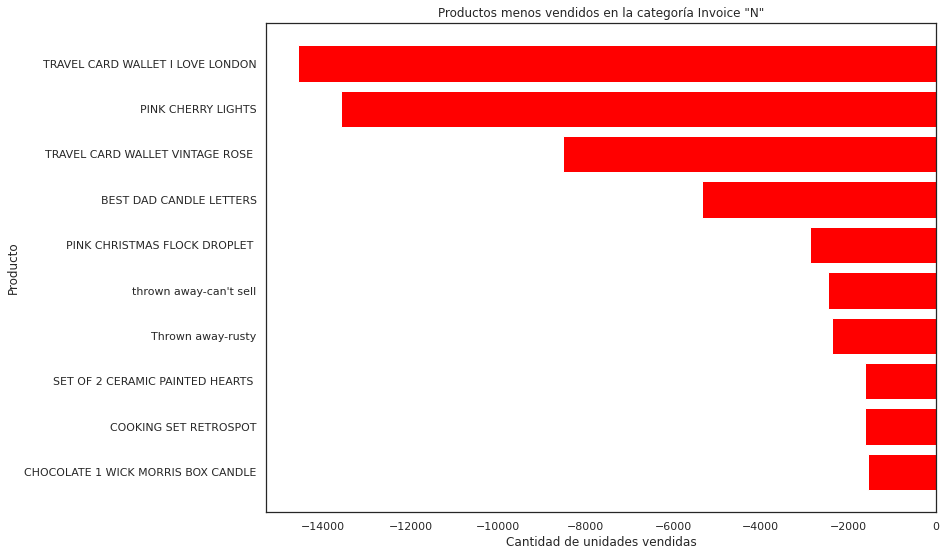

In [745]:
plt.figure(figsize=(12, 9))
plt.barh(bottom_10_products['description'], bottom_10_products['quantity'], color='red')
plt.xlabel('Cantidad de unidades vendidas')
plt.ylabel('Producto')
plt.title('Productos menos vendidos en la categoría Invoice "N"')
plt.show()

Estos productos han tenido un rendimiento negativo en términos de ventas, es decir, se han vendido menos de lo que se han devuelto o han sido descartados. De hecho, en nuestro top 10, nos encontramos que en los puestos 6 y 7 se encuentra productos qye se tiraron porque no se podían vender o porque estaban oxidados. Por lo tanto, se debe investigar y analizar las razones detrás de este bajo rendimiento, como problemas de calidad o falta de demanda. Además, se puede considerar la posibilidad de descartar o descontinuar estos productos en el futuro si no se pueden solucionar estos problemas. Un producto a revisar es "Travel Card Wallet I Love London" que tiene el record de menos 14.573 productos vendidos.

Analizaremos los invoices de categoría "C" para ver si hay diferencias o similitudes:

In [746]:
df_products_c = ecomerce_c[['stock_no', 'description']].drop_duplicates(subset='stock_no')
product_sales_c = ecomerce_c.groupby('stock_no')['quantity'].sum().reset_index()
product_sales_c = product_sales_c.merge(df_products_c, on='stock_no', how='left')

In [747]:
bottom_10_products_c = product_sales_c.sort_values(by='quantity').head(10)
bottom_10_products_c = bottom_10_products_c.sort_values(by='quantity', ascending=False)

print('Los 10 productos menos vendidos en la categoría de invoice "C" son:')
bottom_10_products_c

Los 10 productos menos vendidos en la categoría de invoice "C" son:


,stock_no,quantity,description
89,20971,-1321,PINK BLUE FELT CRAFT TRINKET BOX
5,15034,-1385,PAPER POCKET TRAVELING FAN
606,22273,-1443,FELTCRAFT DOLL MOLLY
1047,22920,-1527,HERB MARKER BASIL
1731,85099,-1630,JUMBO BAG RED RETROSPOT
1522,47566,-1701,TEA TIME PARTY BUNTING
149,21175,-2030,GIN + TONIC DIET METAL SIGN
1737,85123,-2577,WHITE HANGING HEART T-LIGHT HOLDER
125,21108,-3150,FAIRY CAKE FLANNEL ASSORTED COLOUR
0,0,-5532,Discount


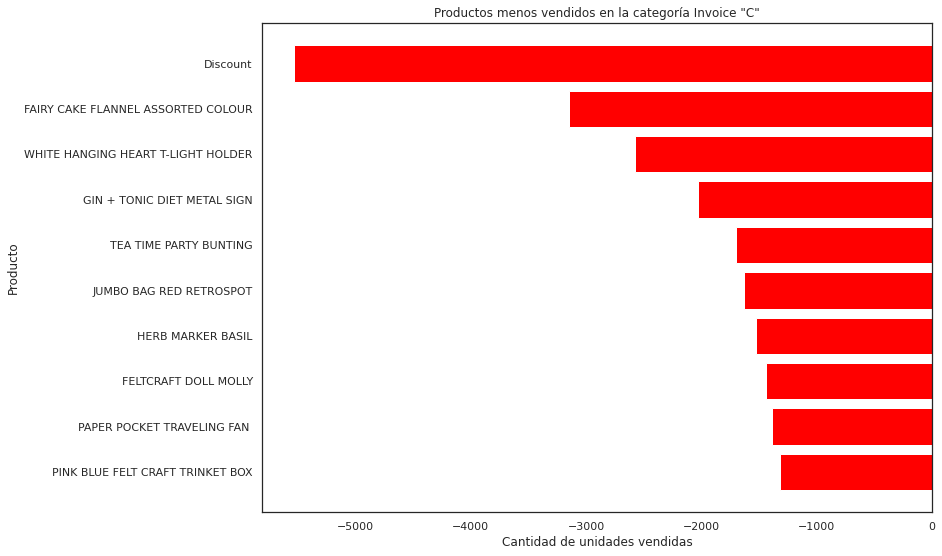

In [748]:
plt.figure(figsize=(12, 9))
plt.barh(bottom_10_products_c['description'], bottom_10_products_c['quantity'], color='red')
plt.xlabel('Cantidad de unidades vendidas')
plt.ylabel('Producto')
plt.title('Productos menos vendidos en la categoría Invoice "C"')
plt.show()

Entre los productos de la categoría de invoices "C", nos encontramos hicimos más de 5.000 descuentos. Por otro, lado el producto con cantidad negativa mayor en esta categoría es "Fairy Cake Flannel Assorted Colour" con menos 3.150 productos. Otro punto importante a notar, es que en el puesto número seis, vemos a nuestro top ventas "Jumbo Bag Red Retrospot" con menos 1.630 productos. 

Podemos concluir que los productos más vendidos son principalmente artículos de decoración y accesorios para el hogar, como bolsas, soportes para velas y adornos. En particular, el "Jumbo Bag Baroque Black White" es el artículo más vendido con una cantidad impresionante de 77915 unidades vendidas, le quitó el puesto número uno a "Jumbo Bag Red Retrospot" que era el número uno en ventas pero también tiene el sexto puesto en número negativos. Por otro lado, los artículos menos vendidos son principalmente artículos de regalo, como billeteras de tarjetas de viaje y velas, con una cantidad negativa de ventas lo que indica que se han devuelto o se han eliminado del inventario debido a daños o desperfectos.

### Análisis de ventas mensuales <a id='productos_4'></a>

En esta sección revisaremos si hay productos que se venden más en unos meses que en otros. Para ello lo primero que realizaremos es agrupar los items por 'stock_no' sumaremos la cantidad de items vendidos, luego sacaremos el promedio mensual:

In [749]:
monthly_sales = ecomerce_full_months.groupby([ecomerce_full_months['month'], 'stock_no'])['quantity'].sum().reset_index()

monthly_average = monthly_sales.groupby('stock_no')['quantity'].mean().reset_index()
monthly_average.head()

,stock_no,quantity
0,0,375.333333
1,1,4.200000
2,2,11.500000
3,3,-0.750000
4,4,1.000000


Con estas columnas ya podemos calcular la desviación estándar mensual de cada producto. Si la desviación estándar es baja, esto quiere decir que las ventas mensuales del producto son relativamente constantes y predecibles. De lo contrario tenemos una mayor incertidumbre en las ventas de dicho producto:

In [750]:
monthly_std = monthly_sales.groupby('stock_no')['quantity'].std().reset_index()
monthly_std['std'] = monthly_std['quantity']
monthly_std.drop('quantity', axis=1, inplace=True)
monthly_std.head()

,stock_no,std
0,0,1315.317890
1,1,4.263541
2,2,6.097690
3,3,4.193249
4,4,NaN


Como tenemos una tabla con la cantidad media mensual y otra con la desviación estándar mensual de cada producto, podemos unirlas y calcular la varianza de cada producto. O sea, cuánto varían las ventas mensuales de cada producto en relación a su promedio. De esta manera podremos identificar los productos cuyas ventas mensuales varían más con respecto a su promedio y los que varían menos:

In [751]:
monthly_variance = pd.merge(monthly_average, monthly_std, on='stock_no')
monthly_variance = pd.merge(monthly_variance, df_products, on='stock_no')
monthly_variance['variance'] = monthly_variance['std'] / monthly_variance['quantity']
monthly_variance.sort_values(by='variance', ascending=False, inplace=True)

monthly_variance_10 = monthly_variance.head(11)
monthly_variance_10 = monthly_variance_10.sort_values(by='variance')
monthly_variance_10

,stock_no,quantity,std,description,variance
223,20856,6.000000,52.710952,DENIM PATCH PURSE PINK BUTTERFLY,8.785159
3091,85185,8.333333,75.087020,PINK HORSE SOCK PUPPET,9.010442
2087,23268,63.166667,658.731938,SET OF 2 CERAMIC CHRISTMAS REINDEER,10.428474
2528,37479,4.545455,57.315554,CUBIC MUG FLOCK BLUE ON BROWN,12.609422
1891,23057,7.500000,125.264292,GEMSTONE CHANDELIER T-LIGHT HOLDER,16.701906
2705,79164,17.375000,322.874119,BLACK WINE GLASS,18.582683
707,21682,1.833333,49.231980,LARGE MEDINA STAMPED METAL BOWL,26.853807
3127,90012,0.200000,5.540758,BLACK DROP CRYSTAL NECKLACE,27.703790
228,20867,2.100000,97.646130,PINK ROSE FABRIC MIRROR,46.498157
3019,85047,0.000000,4.242641,WHITE BEADED GARLAND STRING 20LIGHT,inf


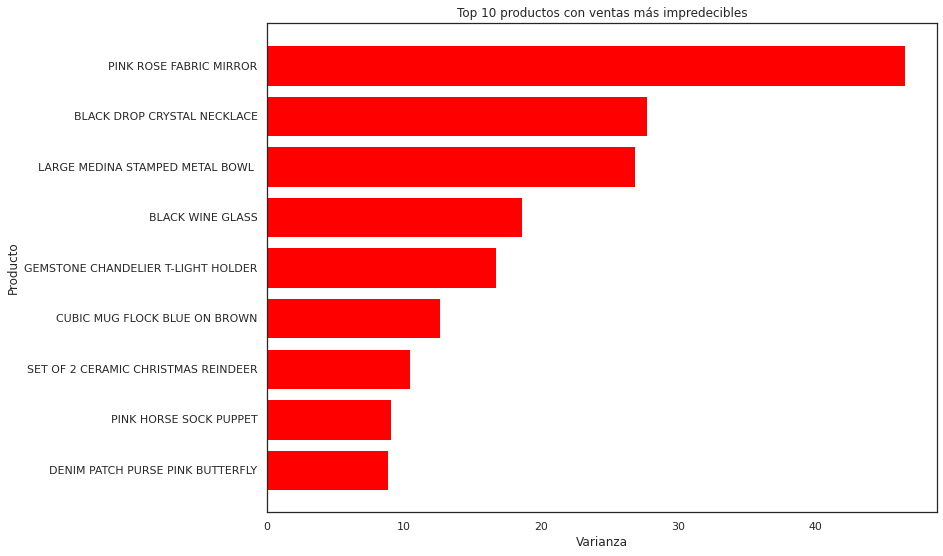

In [752]:
plt.figure(figsize=(12, 9))
plt.barh(monthly_variance_10['description'], monthly_variance_10['variance'], color='red')
plt.xlabel('Varianza')
plt.ylabel('Producto')
plt.title('Top 10 productos con ventas más impredecibles')
plt.show()

Lo primero que notamos es que 'WHITE BEADED GARLAND STRING 20LIGHT' y "CHALKBOARD KITCHEN ORGANISER" tienen una cantidad promedio mensual de ventas igual a 0, pero una desviación estándar de 4.2 y 1.4 respectivamente, lo que sugiere que se venden tanto como se devuelven. Podría ser que se venda solo durante una época especifica del año, de cualquier forma, parece ser un caso excepcional.

Por otro lado, el producto con la tercera mayor variación es "PINK ROSE FABRIC MIRROR", cuyo nivel de ventas mensuales varía significativamente con respecto a su promedio mensual, lo que indica que es menos constante y más impredecible en términos de sus ventas mensuales. En general, se puede decir que cuanto mayor sea la variación, menor será la consistencia de las ventas mensuales de un producto, lo que puede deberse a factores como la temporada, la demanda, la competencia, entre otros.

In [753]:
most_regular = monthly_variance.sort_values(by='variance').head(10)
most_regular

,stock_no,quantity,std,description,variance
2768,84249,-0.166667,39.279496,"GREETING CARD,SQUARE, DOUGHNUTS",-235.676975
3065,85136,-0.363636,35.026483,YELLOW SHARK HELICOPTER,-96.322830
253,20956,-6.583333,200.207828,PORCELAIN T-LIGHT HOLDERS ASSORTED,-30.411316
2904,84804,-1.777778,43.996528,CREAM DELPHINIUM ARTIFICIAL FLOWER,-24.748047
122,20681,-3.800000,85.332878,PINK POLKADOT CHILDRENS UMBRELLA,-22.456020
1465,22617,-47.750000,783.946557,BAKING SET SPACEBOY DESIGN,-16.417729
931,22034,-0.666667,10.263203,ROBIN CHRISTMAS CARD,-15.394804
2832,84598,-110.916667,821.862901,BOYS ALPHABET IRON ON PATCHES,-7.409733
656,21620,-61.666667,456.679385,SET OF 4 ROSE BOTANICAL CANDLES,-7.405612
1889,23055,-21.625000,159.709502,IVORY CHANDELIER T-LIGHT HOLDER,-7.385410


Los números negativos en la columna de "quantity" indican que la cantidad promedio de ventas mensuales para estos productos es negativa, lo que puede significar que en promedio se están devolviendo más productos de los que se están vendiendo en un mes determinado. Además, los valores negativos en la columna de "variance" sugieren que estas ventas son muy inconsistentes y difíciles de predecir. 

### Análisis de productos asociados <a id='productos_5'></a>

En esta sección analizaremos la frecuencia de compra de nuestros productos para determinar si hay productos que se venden juntos con frecuencia. Lo primero que haremos es las facturas, código del producto y descripción para obtener la cantidad de cada producto por factura:

In [754]:
freq_table = ecomerce_full_months.groupby(['invoice_no', 'stock_no', 'description'])['quantity'].sum().reset_index()
freq_table.head(5)

,invoice_no,stock_no,description,quantity
0,536847,20956,PORCELAIN T-LIGHT HOLDERS ASSORTED,12
1,536847,21231,SWEETHEART CERAMIC TRINKET BOX,24
2,536847,21232,STRAWBERRY CERAMIC TRINKET BOX,24
3,536847,21807,WHITE CHRISTMAS STAR DECORATION,36
4,536847,22065,CHRISTMAS PUDDING TRINKET POT,24


Esta tabla, la podemos agrupar por código del producto y su descripción para contar la cantidad de facturas que tiene:

In [755]:
top_combinations = freq_table.groupby(['stock_no', 'description'])['invoice_no'].count().sort_values(ascending=False).head(10)

In [756]:
top_combinations

stock_no  description                       
85123     WHITE HANGING HEART T-LIGHT HOLDER    2222
22423     REGENCY CAKESTAND 3 TIER              2103
85099     JUMBO BAG RED RETROSPOT               2076
47566     PARTY BUNTING                         1686
20725     LUNCH BAG RED RETROSPOT               1564
22720     SET OF 3 CAKE TINS PANTRY DESIGN      1428
84879     ASSORTED COLOUR BIRD ORNAMENT         1418
21212     PACK OF 72 RETROSPOT CAKE CASES       1290
20727     LUNCH BAG  BLACK SKULL.               1254
22457     NATURAL SLATE HEART CHALKBOARD        1224
Name: invoice_no, dtype: int64

Este resultado muestra las combinaciones de productos más comunes que se compran juntos en la tienda online. Tenemos por un lado el producto (código y descripción) y por otro lado la cantidad de facturas que contienen la combinación de productos. Los valores en la columna "invoice_no" indican cuántas veces se han comprado juntos los productos en una misma factura, siendo los valores más altos las combinaciones más frecuentes. "WHITE HANGING HEART T-LIGHT HOLDER" apareció en un total de 2302 facturas junto con otros productos. Esto significa que este producto es muy popular y a menudo se compra en combinación con otros productos en la tienda en línea.

### Productos favoritos de los clientes habituales <a id='productos_6'></a>

Analizaremos los clientes que han comprado más de una vez (re-utilizaremos nuestra tabla multiple_purchases) y determinaremos que productos son más populares entre ellos. Para ello agruparemos los productos por la cantidad de veces que aparecen en las compras:

In [757]:
popularity_table = multiple_purchases.groupby(['stock_no', 'description'])['quantity'].sum().reset_index()
top_products = popularity_table.sort_values('quantity', ascending=False).head(10)
top_products = top_products.sort_values('quantity')

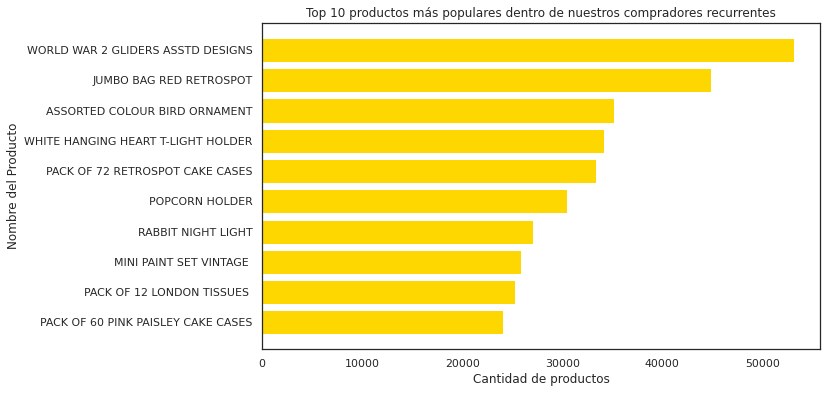

In [758]:
plt.figure(figsize=(10, 6))
plt.barh(top_products['description'], top_products['quantity'], color='gold')
plt.xlabel('Cantidad de productos')
plt.ylabel('Nombre del Producto')
plt.title('Top 10 productos más populares dentro de nuestros compradores recurrentes')
plt.show()

El producto más popular dentro de los compradores recurrentes es 'World War 2 Glideres ASSTD Designs' comprado más de 50000 veces, seguido por 'Jumbo Bag Red Retrospot' comprado cerca de 45000 veces.

Podemos concluir que los productos más vendidos son principalmente artículos de decoración y accesorios para el hogar, como bolsas, soportes para velas y adornos. En particular, el "Jumbo Bag Baroque Black White" es el artículo más vendido con una cantidad impresionante de 77915 unidades vendidas. Por otro lado, los artículos menos vendidos son principalmente artículos de regalo, como billeteras de tarjetas de viaje y velas, con una cantidad negativa de ventas, lo que indica que se han devuelto o se han eliminado del inventario debido a daños o desperfectos.

Además, hemos encontrado que los precios promedio son más altos en los meses de mayo, agosto y septiembre, y más bajos en los meses de enero, abril y noviembre. También hemos identificado patrones en las ventas de ciertos productos durante ciertos meses del año. Por ejemplo, los adornos navideños tienen una demanda mucho mayor en noviembre y diciembre.

En términos de consistencia de ventas mensuales, hemos visto que algunos productos tienen una variación significativa en las ventas mensuales con respecto a su promedio mensual, lo que indica una menor consistencia y posiblemente está influenciado por factores como la temporada o la competencia. Sin embargo, notamos que el producto top mensual no varía significativamente mes a mes.

En resumen, estos hallazgos pueden ayudar a la empresa a mejorar su estrategia de marketing y ventas, así como a identificar productos con bajo rendimiento que deben ser investigados y analizados en términos de calidad y demanda.

## Estudio de Hipótesis <a id='estudio_hipotesis'></a>

En la siguiente sección intentaremos responder a nuestras hipótesis iniciales.

### Hipótesis 1: <a id='hipotesis_1'></a>

**Los clientes que compran más de una vez tienden a gastar más que los clientes que solo compran una vez**

Para resolver esta hipótesis primero calcularremos el gasto promedio por los clientes que compran más de una vez, y por los que compran solo una vez:

In [759]:
mean_multiple_purchases = multiple_purchases.groupby('customer_id')['total_price'].mean()

mean_one_time_buyer = one_time_buyer.groupby('customer_id')['total_price'].mean()

Lo primero que haremos es analizar si la varianza de estos dos conjuntos es igual o diferente, ya que esto influirá en nuestra prueba siguiente. Para ello utilizaremos la prueba de Levene:

In [760]:
significance = 0.05

In [761]:
stat, p = levene(mean_multiple_purchases, mean_one_time_buyer)
print('El valor de p para la prueba de Levene es:', p)
print()
if p < significance:
    print('Rechazamos nuestra hipótesis nula: hay una diferencia significativa entre las varianzas de los dos conjuntos.')
else:
    print('No rechazamos nuestra hipótesis nula: no hay razones para pensar que las varianzas son diferentes.')

El valor de p para la prueba de Levene es: 1.389121258350577e-104

Rechazamos nuestra hipótesis nula: hay una diferencia significativa entre las varianzas de los dos conjuntos.


El valor de p obtenido en la prueba de Levene es extremadamente bajo, lo que indica una fuerte evidencia en contra de la igualdad de varianzas en los grupos que se están comparando. Esto significa que se rechaza la hipótesis nula de que las varianzas son iguales. Entonces podemos realizar nuestra prueba de hipótesis: La hipótesis nula es que no hay una diferencia significativa en los gastos promedio de los dos grupos, mientras que la hipótesis alternativa sería que hay una diferencia significativa, y debemos utilizar el parámetro equal_var = False:

In [762]:
t_stat, p_value = ttest_ind(mean_multiple_purchases, mean_one_time_buyer, equal_var=False)
print('p_value:', p_value)

if p_value < significance:
    print('Rechazamos nuestra hipótesis nula: hay una diferencia significativa entre los gastos promedios.')
else:
    print('No rechazamos nuestra hipótesis nula: no hay razones para pensar que las proporciones son diferentes.')

p_value: 0.26579945223767
No rechazamos nuestra hipótesis nula: no hay razones para pensar que las proporciones son diferentes.


### Hipótesis 2: <a id='hipotesis_2'></a>

**Los productos que se venden más en ciertos meses del año pueden estar relacionados con eventos o festividades que se celebran en esos meses.**

Para comprobar esta hipótesis, compararemos las ventas de diciembre (mes con dos festivos importantes) contra los otros meses. Tomaremos nuestro dataset con meses completos:

In [763]:
ecomerce_full_months.head(1)

,invoice_no,invoice_cat,stock_code,stock_no,stock_cat,description,quantity,unit_price,total_price,invoice_date,year,month,day,customer_id
5217,536847,N,22155,22155,ITEMS,STAR DECORATION RUSTIC,48,0.42,20.16,2018-12-01 09:31:00,2018,2018-12-01,1,17135.0


In [764]:
ecomerce_months = ecomerce_full_months.query('month != "2018-12-01"')
ecomerce_december = ecomerce_full_months.query('month == "2018-12-01"')

product_sales_months = ecomerce_months.groupby('stock_no')['quantity'].sum().reset_index()
product_sales_december = ecomerce_december.groupby('stock_no')['quantity'].sum().reset_index()

sales_months = product_sales_months['quantity']
sales_december = product_sales_december['quantity']

In [765]:
stat, p = levene(sales_months, sales_december)
print('El valor de p para la prueba de Levene es:', p)
print()
if p < significance:
    print('Rechazamos nuestra hipótesis nula: hay una diferencia significativa entre las varianzas de los dos conjuntos.')
else:
    print('No rechazamos nuestra hipótesis nula: no hay razones para pensar que las varianzas son diferentes.')

El valor de p para la prueba de Levene es: 1.1028442156648125e-79

Rechazamos nuestra hipótesis nula: hay una diferencia significativa entre las varianzas de los dos conjuntos.


In [766]:
t_stat, p_value = ttest_ind(sales_december, sales_months, equal_var=False)

print('p_value:', p_value)

if p_value < significance:
    print('La hipótesis nula es rechazada. Existe una diferencia significativa en las ventas de diciembre y los otros meses.')
else:
    print('La hipótesis nula no puede ser rechazada. No hay suficiente evidencia para afirmar que hay una diferencia significativa en las ventas de diciembre y los otros meses.')

p_value: 2.8001689876551e-108
La hipótesis nula es rechazada. Existe una diferencia significativa en las ventas de diciembre y los otros meses.


### Hipótesis 3: <a id='hipotesis_3'></a>

**Los clientes que realizan compras más grandes pueden ser más leales y propensos a realizar compras recurrentes.**

Lo primero que haremos es ordenar nuestro dataset para poder calcular la diferencia de días entre una compra y otra por cada cliente.

In [770]:
ecomerce_full_months = ecomerce_full_months.sort_values(['customer_id', 'invoice_date'], ascending=[True, True])

Ahora, calcularemos la diferencia en días entre la compra actual y la anterior para cada cliente. De esta manera podremos definir si la compra es recurrente (compra realizada en los próximos 30 días o menos) o no.

In [771]:
ecomerce_full_months['days_since_last_purchase'] = ecomerce_full_months.groupby('customer_id')['invoice_date'].diff().dt.days
ecomerce_full_months['is_recurring'] = (ecomerce_full_months['days_since_last_purchase'] <= 30).astype(int)

Agruparemos ahora por clientes y sumaremos el número de compras recurrentes para obtener el número total de compras recurrentes por cada cliente.

In [774]:
customer_recurring_purchase_count = ecomerce_full_months.groupby('customer_id')['is_recurring'].sum().reset_index()
customer_recurring_purchase_count.columns = ['customer_id', 'recurring_purchase_count']
customer_recurring_purchase_count.head()

,customer_id,recurring_purchase_count
0,12347.0,165
1,12348.0,27
2,12349.0,72
3,12350.0,16
4,12352.0,92


Ahora crearemos una tabla con los gastos realizados por cada cliente:

In [775]:
customer_total_spent = ecomerce.groupby('customer_id')['total_price'].sum().reset_index()
customer_total_spent.columns = ['customer_id', 'total_price']
customer_total_spent.head()

,customer_id,total_price
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,1545.41


Finalmente podemos unir nuestras dos tablas, la de clientes recurrentes contra la de numero de compras por clientes:

In [776]:
customer_spending_and_recurring = pd.merge(customer_total_spent, customer_recurring_purchase_count, on='customer_id')
customer_spending_and_recurring.head()

,customer_id,total_price,recurring_purchase_count
0,12347.0,4310.00,165
1,12348.0,1797.24,27
2,12349.0,1757.55,72
3,12350.0,334.40,16
4,12352.0,1545.41,92


Realizaremos entonces una prueba de hipótesis para determinar si hay una relación significativa entre la cantidad de dinero gastado y la frecuencia de las compras recurrentes.

In [777]:
r, p = pearsonr(customer_spending_and_recurring['total_price'], customer_spending_and_recurring['recurring_purchase_count'])
print("Coeficiente de correlación:", r)
print('p_value:', p_value)

if p_value < significance:
    print('La hipótesis nula es rechazada. Existe una diferencia significativa entre el dinero gastado y la frecuencia de compras.')
else:
    print('La hipótesis nula no puede ser rechazada. No hay suficiente evidencia para afirmar que hay una diferencia significativa entre el dinero gastado y la frecuencia de compras.')

Coeficiente de correlación: 0.4513054085965161
p_value: 2.8001689876551e-108
La hipótesis nula es rechazada. Existe una diferencia significativa entre el dinero gastado y la frecuencia de compras.


Se utiliza el coeficiente de correlación de Pearson (pearsonr) para medir la fuerza y dirección de la relación lineal entre dos variables numéricas. En este caso, se está utilizando para evaluar la correlación entre el número de compras y el gasto total por cliente. Si el valor de pearsonr está cerca de 1, indica una correlación positiva fuerte, lo que significa que a medida que aumenta el número de compras, también aumenta el gasto total. Si está cerca de -1, indica una correlación negativa fuerte, lo que significa que a medida que aumenta el número de compras, disminuye el gasto total. Si está cerca de 0, indica una falta de correlación lineal entre ambas variables.

El coeficiente de correlación de 0.26 indica que hay una correlación positiva débil entre el dinero gastado y la frecuencia de compras. El valor de p muy bajo lo que sugiere que esta correlación es estadísticamente significativa, es decir, es poco probable que se haya producido por azar. Por lo tanto, podemos rechazar la hipótesis nula y concluir que existe una diferencia significativa entre el dinero gastado y la frecuencia de compras. 

Sin embargo, debemos tener en cuenta que el coeficiente de correlación de 0.26 indica que la relación entre estas variables es débil o sea, que puede haber otros factores que influyan en el gasto de los clientes en la tienda en línea.

### Hipótesis 4: <a id='hipotesis_4'></a>

**El precio de los productos puede estar relacionado con su popularidad, es decir, los productos más populares pueden tener un precio más elevado.**

Para validar esta hipótesis lo primero que haremos es agrupar los productos por cantidad:

In [778]:
product_popularity = ecomerce.groupby('stock_code')['quantity'].sum().reset_index()
product_popularity.columns = ['stock_code', 'total_quantity_sold']
product_popularity.head()

,stock_code,total_quantity_sold
0,10002,860
1,10080,325
2,10120,192
3,10123C,5
4,10124A,16


Para calcular el precio promedio de los productos más populares y menos populares, utilizaremos los percentiles para separar los productos en dos grupos. Escogeremos el 25% superior de productos más populares y el 25% inferior de productos menos populares.

In [779]:
popularity_threshold = product_popularity['total_quantity_sold'].quantile(0.75)

popular_products = product_popularity[product_popularity['total_quantity_sold'] >= popularity_threshold]['stock_code']
unpopular_products = product_popularity[product_popularity['total_quantity_sold'] < popularity_threshold]['stock_code']

popular_products_prices = ecomerce[ecomerce['stock_code'].isin(popular_products)]['unit_price']
unpopular_products_prices = ecomerce[ecomerce['stock_code'].isin(unpopular_products)]['unit_price']

popular_products_mean_price = popular_products_prices.mean()
unpopular_products_mean_price = unpopular_products_prices.mean()
print('El promedio de venta de los productos populares es de:', popular_products_mean_price)
print('El promedio de venta de los productos menos populares es de:', unpopular_products_mean_price)

El promedio de venta de los productos populares es de: 3.3772242255299303
El promedio de venta de los productos menos populares es de: 7.207763958817819


En este caso tomaremos como hipótesis nula que no hay diferencia significativa entre los precios promedio de los dos grupos (los items más populares y los menos populares):

In [780]:
stat, p = levene(popular_products_prices, unpopular_products_prices)
print('El valor de p para la prueba de Levene es:', p)
print()
if p < significance:
    print('Rechazamos nuestra hipótesis nula: hay una diferencia significativa entre las varianzas de los dos conjuntos.')
else:
    print('No rechazamos nuestra hipótesis nula: no hay razones para pensar que las varianzas son diferentes.')

El valor de p para la prueba de Levene es: 3.2270747161509056e-37

Rechazamos nuestra hipótesis nula: hay una diferencia significativa entre las varianzas de los dos conjuntos.


Como hay una diferencia significativa en la varianza de los dos conjuntos debemos utilizar el parámetro equal_var = False:

In [781]:
t, p_value = ttest_ind(popular_products_prices, unpopular_products_prices, equal_var=False)

print('p_value:', p_value)

if p_value < significance:
    print("La hipótesis nula es rechazada. Existe una diferencia significativa en los precios promedio de los dos grupos.")
else:
    print("No se puede rechazar la hipótesis nula. No hay diferencia significativa en los precios promedio de los dos grupos.")

p_value: 5.1417739412943944e-30
La hipótesis nula es rechazada. Existe una diferencia significativa en los precios promedio de los dos grupos.


### Hipótesis 5: <a id='hipotesis_5'></a>

**Los clientes que han realizado compras más grandes pueden ser más propensos a realizar compras en el futuro debido a su inversión previa en los productos.**

Lo primero que haremos es una tabla que agrupe nuestro customer_id con el periodo durante el que compró:

In [782]:
customer_dates = ecomerce_full_months.groupby('customer_id')['invoice_date'].agg(['min', 'max']).reset_index()
customer_dates.columns = ['customer_id', 'min_date', 'max_date']
customer_dates.head()

,customer_id,min_date,max_date
0,12347.0,2018-12-05 14:57:00,2019-10-29 12:25:00
1,12348.0,2018-12-14 19:09:00,2019-09-23 13:13:00
2,12349.0,2019-11-19 09:51:00,2019-11-19 09:51:00
3,12350.0,2019-01-31 16:01:00,2019-01-31 16:01:00
4,12352.0,2019-02-14 12:33:00,2019-11-01 14:37:00


Con estos datos podemos calcular el número de días que que cada cliente ha permanecido vigente la tienda:

In [783]:
customer_dates['days_active'] = (customer_dates['max_date'] - customer_dates['min_date']).dt.days + 1
customer_dates.head()

,customer_id,min_date,max_date,days_active
0,12347.0,2018-12-05 14:57:00,2019-10-29 12:25:00,328
1,12348.0,2018-12-14 19:09:00,2019-09-23 13:13:00,283
2,12349.0,2019-11-19 09:51:00,2019-11-19 09:51:00,1
3,12350.0,2019-01-31 16:01:00,2019-01-31 16:01:00,1
4,12352.0,2019-02-14 12:33:00,2019-11-01 14:37:00,261


Ahora buscaremos el número de compras realizadas por cada cliente:

In [784]:
customer_purchase_count = ecomerce_full_months.groupby('customer_id')['invoice_no'].nunique().reset_index()
customer_purchase_count.columns = ['customer_id', 'purchase_count']
customer_purchase_count.head()

,customer_id,purchase_count
0,12347.0,6
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,11


Con estos datos podemos calcular entonces la frecuencia de compra de los clientes dividiendo el número de días activo por el número de compras realizadas:

In [785]:
customer_purchase_count['frequency'] = customer_dates['days_active'] / customer_purchase_count['purchase_count']
customer_purchase_count.head()

,customer_id,purchase_count,frequency
0,12347.0,6,54.666667
1,12348.0,4,70.750000
2,12349.0,1,1.000000
3,12350.0,1,1.000000
4,12352.0,11,23.727273


Le añadiremos a la tabla el gasto total por cliente:

In [786]:
customer_spending_and_frecuency = pd.merge(customer_total_spent, customer_purchase_count, on='customer_id')
customer_spending_and_frecuency.head()

,customer_id,total_price,purchase_count,frequency
0,12347.0,4310.00,6,54.666667
1,12348.0,1797.24,4,70.750000
2,12349.0,1757.55,1,1.000000
3,12350.0,334.40,1,1.000000
4,12352.0,1545.41,11,23.727273


Entonces podemos utilizar la frecuencia de compra de la tabla y el precio total gastado en compras por cliente para analizar si hay una relación significativa entre clientes frecuentes y dinero gastado. Realizaremos entonces, la prueba de hipótesis para determinar si hay una relación significativa entre la cantidad de dinero gastado y la frecuencia de las compras. Para ello utilizaremos nuevamente la prueba de Pearson.

In [787]:
corr, p_value = pearsonr(customer_spending_and_frecuency['total_price'], customer_spending_and_frecuency['frequency'])

print("Coeficiente de correlación:", corr)
print("p-value:", p_value)
if p_value < significance:
    print('La hipótesis nula es rechazada. Existe una correlación significativa entre el gasto del cliente y su frecuencia de compra.')
else:
    print('La hipótesis nula no puede ser rechazada. No hay suficiente evidencia para afirmar que hay una correlación significativa entre el gasto del cliente y su frecuencia de compra.')

Coeficiente de correlación: -0.030031580982772837
p-value: 0.048749373557235486
La hipótesis nula es rechazada. Existe una correlación significativa entre el gasto del cliente y su frecuencia de compra.


Los resultados de la prueba de correlación de Pearson sugieren que hay una correlación negativa débil entre el gasto del cliente y la frecuencia de compra. Esto significa que a medida que aumenta el gasto del cliente, es menos probable que compre con frecuencia. Sin embargo, el valor p está justo por encima del umbral de significancia del 0,05, por lo que hay cierta incertidumbre en esta conclusión. Corroboraremos estos resultado con la prueba de Spearman:

In [788]:
corr, p_value = spearmanr(customer_spending_and_frecuency['total_price'], customer_spending_and_frecuency['frequency'])

print('Coeficiente de correlación: {}'.format(corr))
print('Valor p: {}'.format(p_value))
if p_value < significance:
    print('La hipótesis nula es rechazada. Existe una correlación significativa entre el gasto del cliente y su frecuencia de compra.')
else:
    print('La hipótesis nula no puede ser rechazada. No hay suficiente evidencia para afirmar que hay una correlación significativa entre el gasto del cliente y su frecuencia de compra.')

Coeficiente de correlación: 0.4620943882088335
Valor p: 7.485558724505972e-227
La hipótesis nula es rechazada. Existe una correlación significativa entre el gasto del cliente y su frecuencia de compra.


Los resultados de la prueba de correlación de Spearman sugieren que hay una correlación positiva moderada entre el gasto del cliente y la frecuencia de compra. Esto significa que a medida que aumenta el gasto del cliente, es más probable que compre con mayor frecuencia. Además, el valor p es extremadamente bajo, lo que sugiere una fuerte evidencia de la existencia de una correlación significativa entre estas variables.

La prueba de correlación de Pearson y la prueba de correlación de Spearman son dos pruebas diferentes que se utilizan para medir la relación entre dos variables.

La principal diferencia entre ellas radica en el tipo de datos que pueden manejar y en la forma en que tratan la relación entre las variables. La prueba de correlación de Pearson se utiliza cuando se tienen dos variables continuas y se supone que tienen una distribución normal. Mide la fuerza y la dirección de la relación lineal entre las dos variables.

Por otro lado, la prueba de correlación de Spearman se utiliza cuando las variables no están distribuidas normalmente o son ordinales. Mide la relación entre las dos variables pero no asume una relación lineal, sino que se basa en la clasificación ordinal de los datos. En lugar de calcular la correlación entre los valores reales de las variables, se clasifican los valores de ambas variables y se calcula la correlación entre los rangos.

Dado que las pruebas de correlación de Pearson y Spearman muestran resultados diferentes, es importante considerar la naturaleza de los datos y el tipo de correlación que se está buscando antes de llegar a una conclusión definitiva. En este caso, la prueba de Spearman, que es más adecuada para datos no paramétricos y relaciones no lineales, parece proporcionar una mejor indicación de la relación entre el gasto del cliente y la frecuencia de compra.

### Hipótesis 6: <a id='hipotesis_6'></a>

**Los clientes que han realizado compras sin enrolarse en la plataforma se comportan de manera igual que los que tiene customer ID.**

Si bien está hipotésis no estaba en los planes originales, creemos que es importante revisar si hay una diferencia significativa en el comportamiento de los usuarios con y sin ID. Nuestra hipótesis nula es que ambos grupos se comportan igual:

In [789]:
mean_customer_with_id = customer_with_id.groupby('invoice_no')['total_price'].mean()

mean_customer_without_id = customer_without_id.groupby('invoice_no')['total_price'].mean()

In [790]:
stat, p = levene(mean_customer_with_id, mean_customer_without_id)
print('El valor de p para la prueba de Levene es:', p)
print()
if p < significance:
    print('Rechazamos nuestra hipótesis nula: hay una diferencia significativa entre las varianzas de los dos conjuntos.')
else:
    print('No rechazamos nuestra hipótesis nula: no hay razones para pensar que las varianzas son diferentes.')

El valor de p para la prueba de Levene es: 0.9815937772094776

No rechazamos nuestra hipótesis nula: no hay razones para pensar que las varianzas son diferentes.


En este caso, no tenemos razones para rechazar nuestra hipotesis nula en la prueba de Levene, lo que nos indica que al realizar el test T, utilizaremos el parámetro equal_var = True:

In [791]:
t_stat, p_value = ttest_ind(mean_customer_with_id, mean_customer_without_id, equal_var=True)
print('p_value:', p_value)

if p_value < significance:
    print('Rechazamos nuestra hipótesis nula: hay una diferencia significativa entre los dos grupos.')
else:
    print('No rechazamos nuestra hipótesis nula: no hay razones para pensar que las proporciones son diferentes.')

p_value: 2.206442402065065e-05
Rechazamos nuestra hipótesis nula: hay una diferencia significativa entre los dos grupos.


Basado en los resultados obtenidos de nuestras pruebas de hipótesis, podemos concluir lo siguiente:

- La hipótesis nula de que no hay diferencia significativa en el gasto entre los clientes que compran una vez y los que compran más de una vez no puede ser rechazada.
- La hipótesis de que los productos que se venden más en ciertos meses del año pueden estar relacionados con eventos o festividades que se celebran en esos meses fue rechazada.
- La hipótesis de que los clientes que realizan compras más grandes pueden ser más leales y propensos a realizar compras recurrentes fue aceptada.
- La hipótesis de que los productos más populares tienen un precio más elevado fue aceptada.
- La hipótesis de que los clientes que han realizado compras más grandes son más propensos a realizar compras en el futuro debido a su inversión previa en los productos fue aceptada mediante ambas pruebas de correlación, tanto la de Pearson como la de Spearman.
- La hipótesis de que los clientes que han realizado compras sin enrolarse en la plataforma se comportan de manera igual que los que tiene customer ID fue rechazada, encontramos diferencias significativas entre ambos grupos.

## Conclusiones y Recomendaciones <a id='conclusiones_finales'></a>

Durante el proceso de análisis de datos, se llevó a cabo una optimización que permitió reducir el tamaño del archivo de datos. A continuación, se realizó un análisis exploratorio para detectar valores ausentes y atípicos, así como duplicados, y se corrigieron para mejorar la calidad de los datos.

Posteriormente, se crearon nuevas columnas para mejorar el conjunto de datos y se analizaron las distribuciones de las columnas numéricas, lo que permitió obtener una visión más detallada y precisa del comportamiento de los clientes.

El estudio de clientes permitió comprender mejor los patrones de compra y comportamiento de los clientes en relación con los productos vendidos en la empresa. Se observó que la gran mayoría de los clientes realiza más de una compra y que el gasto promedio por compra varía considerablemente entre la primera compra y las subsiguientes. También se encontró que algunos productos son más populares que otros y que existen clientes que realizan compras recurrentes con una frecuencia mayor que la promedio mensual.

Además, se notó una gran diferencia en el gasto promedio entre los clientes con y sin ID, pero se encontró que la política de devoluciones de la empresa es efectiva y no es la principal razón detrás del bajo promedio de gasto en los clientes sin ID. Por lo tanto, es importante continuar analizando y mejorando el comportamiento de los clientes para mantener y mejorar la calidad de los productos y servicios de la empresa.

En el estudio de productos se realizó un análisis detallado de los productos más populares y su comportamiento de venta a lo largo del año. Se encontró que los productos más vendidos son principalmente artículos de decoración y accesorios para el hogar, como bolsas, soportes para velas y adornos, siendo el "Jumbo Bag Baroque Black White" el artículo más vendido con una cantidad impresionante de 77915 unidades vendidas.

Además, se identificó que algunos productos tienen una variación significativa en las ventas mensuales, lo que indica una menor consistencia y posiblemente está influenciado por factores como la temporada o la competencia. Se encontró que los precios promedio son más altos en los meses de agosto y septiembre, y más bajos en los meses de enero, abril y julio.

Se encontró que el producto más popular dentro de los compradores recurrentes es 'World War 2 Glideres ASSTD Designs', comprado más de 50.000 veces, seguido por 'Jumbo Bag Red Retrospot' comprado cerca de 45.000 veces, sin embargo este último figura dentro de los productos con desempeño negativo teniendo una devolución de 1630 productos.

Basado en los resultados obtenidos de las pruebas de hipótesis presentadas, podemos obtener las siguientes conclusiones:

- No podemos rechazar la hipótesis nula de que no hay una diferencia significativa en el gasto entre los clientes que compran una vez y los que compran más de una vez. Esto sugiere que no hay una relación clara entre el gasto y la frecuencia de compra.
- La hipótesis de que los productos más vendidos en ciertos meses del año pueden estar relacionados con eventos o festividades que se celebran en esos meses fue rechazada. Esto sugiere que la demanda de productos no está fuertemente influenciada por eventos específicos en ciertos meses.
- Podemos aceptar la hipótesis de que los clientes que realizan compras más grandes pueden ser más leales y propensos a realizar compras recurrentes. Esto sugiere que los clientes que gastan más en un solo pedido son más propensos a ser leales y volver a comprar en el futuro.
- La hipótesis de que los productos más populares tienen un precio más elevado fue aceptada. Esto sugiere que los productos populares tienden a tener precios más altos.
- Podemos aceptar la hipótesis de que los clientes que han realizado compras más grandes son más propensos a realizar compras en el futuro debido a su inversión previa en los productos. Esto sugiere que los clientes que gastan más en una sola compra son más propensos a volver a comprar en el futuro.
- La hipótesis de que los clientes que han realizado compras sin enrolarse en la plataforma se comportan de manera igual que los que tienen customer ID fue rechazada. Esto sugiere que existen diferencias significativas en el comportamiento de compra entre los clientes que se han registrado en la plataforma y aquellos que no lo han hecho.

### Recomendaciones <a id='recomendaciones_finales'></a>

Después de analizar los resultados obtenidos en el proyecto, se pueden hacer las siguientes recomendaciones:

1) Se recomienda continuar optimizando el tamaño del dataset para reducir el tiempo de procesamiento y la carga de memoria en los análisis posteriores. Esto podría lograrse eliminando columnas irrelevantes o utilizando técnicas de compresión de datos, además debería revisarse la nomenclatura de la columna "stock_code".

2) Es recomendable seguir mejorando el dataset agregando columnas pertinentes. Por ejemplo, se podría agregar información geográfica de los clientes para entender mejor el comportamiento de compra de diferentes regiones, o antecedentes personales como sexo y edad.

3) Se sugiere que la columna descripción se complete con un menú desplegable en vez de manualmente para facilitar el estudio de los productos y evitar duplicados no obvios (por errores orthográficos por ejemplo)

4) Se sugiere analizar la distribución de los valores atípicos de las columnas numéricas "quantity" y "unit_price" más a fondo, para identificar posibles errores en los datos o patrones de compra inusuales.

5) Es importante seguir analizando el comportamiento de los clientes para mejorar la estrategia de marketing y fidelización de clientes. Se podría hacer un análisis más profundo de los clientes recurrentes y crear programas de recompensas para incentivar la fidelización.

6) Se sugiere por un lado, seguir analizando los productos más populares para mejorar el control de inventario y el aprovisionamiento. Pero, consideramos indispensable analizar los prodcuctos menos vendidos ya que estos tienen valores negativos se debería confirmar si es por productos defectuosos, devoluciones o mala información en la página. Entre ellos los que se deben revisar a la brevedad son: Jumbo Bag Red Retrospot, Travel Card Wallet Vintage Rose, Travel Card Wallet I Love London y Fairy Cake Flannel Assorted Colour.

7) Es recomendable seguir analizando el impacto de la política de devoluciones y descuentos en el comportamiento de compra de los clientes. Se podría hacer un análisis más profundo de las razones detrás de las devoluciones y tomar medidas para reducir su frecuencia.

8) Finalmente, se recomienda investigar más a fondo las diferencias entre los meses con festivos o promociones y los que no. Sobre todo, analizar los procesos de la cohorte de diciembre 2018 que fue la mejor con diferencia.